# Проект: Исследование компьютерные игры.
<a id="0"></a>
1. [Описание проекта](#1)  
2. [Первичный анализ данных](#2) <br>
   [Вывод](#2_0)<br>
3. [Предобработка данных](#3) <br>
3.1. [Обработка пропусков](#3_1)<br>
3.2. [Изменение типов данных](#3_2)<br>
3.3. [Обработка дубликатов](#3_3)<br>
3.4. [Обработка аномальных значений](#3_4)<br>
3.5. [Дополнительные параметры](#3_5)<br>
     [Вывод](#3_0)
4. [Исследовательский анализ данных](#4)<br>
4.1 [Год выпуска игры](#4_1)<br>
4.2 [Игровая платформа](#4_2)<br>
4.3 [Исследование актуального периода: прогноз на 2017 год](#4_3)<br>
5. [Портреты пользователей](#5)<br>
     [Вывод](#5_0)
6. [Статистический анализ данных](#6)<br>
6.1. [Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#6_1)<br>
6.2. [Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные](#6_2)<br>
7. [Общий вывод](#7)

## 1. Описание проекта 
<a id="1"></a>

**Цель и контекст исследования** <br>
Исследование проводится для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Необходимо выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании магазина.

**Входные данные**<br> 
Из открытых источников в файле "games.csv" содержатся исторические данные (до 2016 года) о продажах игр, оценки пользователей и экспертов, жанры, платформы и др. характеристики. Данные за 2016 год могут быть неполными.

**План исследования**
1. Получение данных. Обзор и первичный анализ данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Портреты пользователей
5. Статистический анализ данных.
6. Результаты исследования.

## 2. Первичный анализ данных.
<a id="2"></a>

In [1]:
pip install -q missingno;

Note: you may need to restart the kernel to use updated packages.


In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import missingno as msno
import seaborn as sns

In [4]:
# Загрузка данных из csv-файла в датафрейм c помощью библиотеки pandas.
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [5]:
# Выведем первые 10 строчек датафрейма пользователи на экран.
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Описание данных**<br>
`Name` — название игры<br>
`Platform` — платформа<br>
`Year_of_Release` — год выпуска<br>
`Genre` — жанр игры<br>
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)<br>
`EU_sales` — продажи в Европе (миллионы проданных копий)<br>
`JP_sales` — продажи в Японии (миллионы проданных копий)<br>
`Other_sale`s — продажи в других странах (миллионы проданных копий)<br>
`Critic_Score` — оценка критиков (максимум 100)<br>
`User_Score` — оценка пользователей (максимум 10)<br>
`Rating` — рейтинг от организации ESRB. (возрастная категория)

In [6]:
# Выведем основную информацию о датафрейме пользователи
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# Выведем количество пропущенных значений для каждого столбца
data_null = data.isna()
data_null.apply(['sum', 'mean']).T.style.format({'sum':'{:.0f}','mean':'{:.2%}'}).background_gradient(cmap='Blues', axis=0)

,sum,mean
Name,2,0.01%
Platform,0,0.00%
Year_of_Release,269,1.61%
Genre,2,0.01%
NA_sales,0,0.00%
EU_sales,0,0.00%
JP_sales,0,0.00%
Other_sales,0,0.00%
Critic_Score,8578,51.32%
User_Score,6701,40.09%


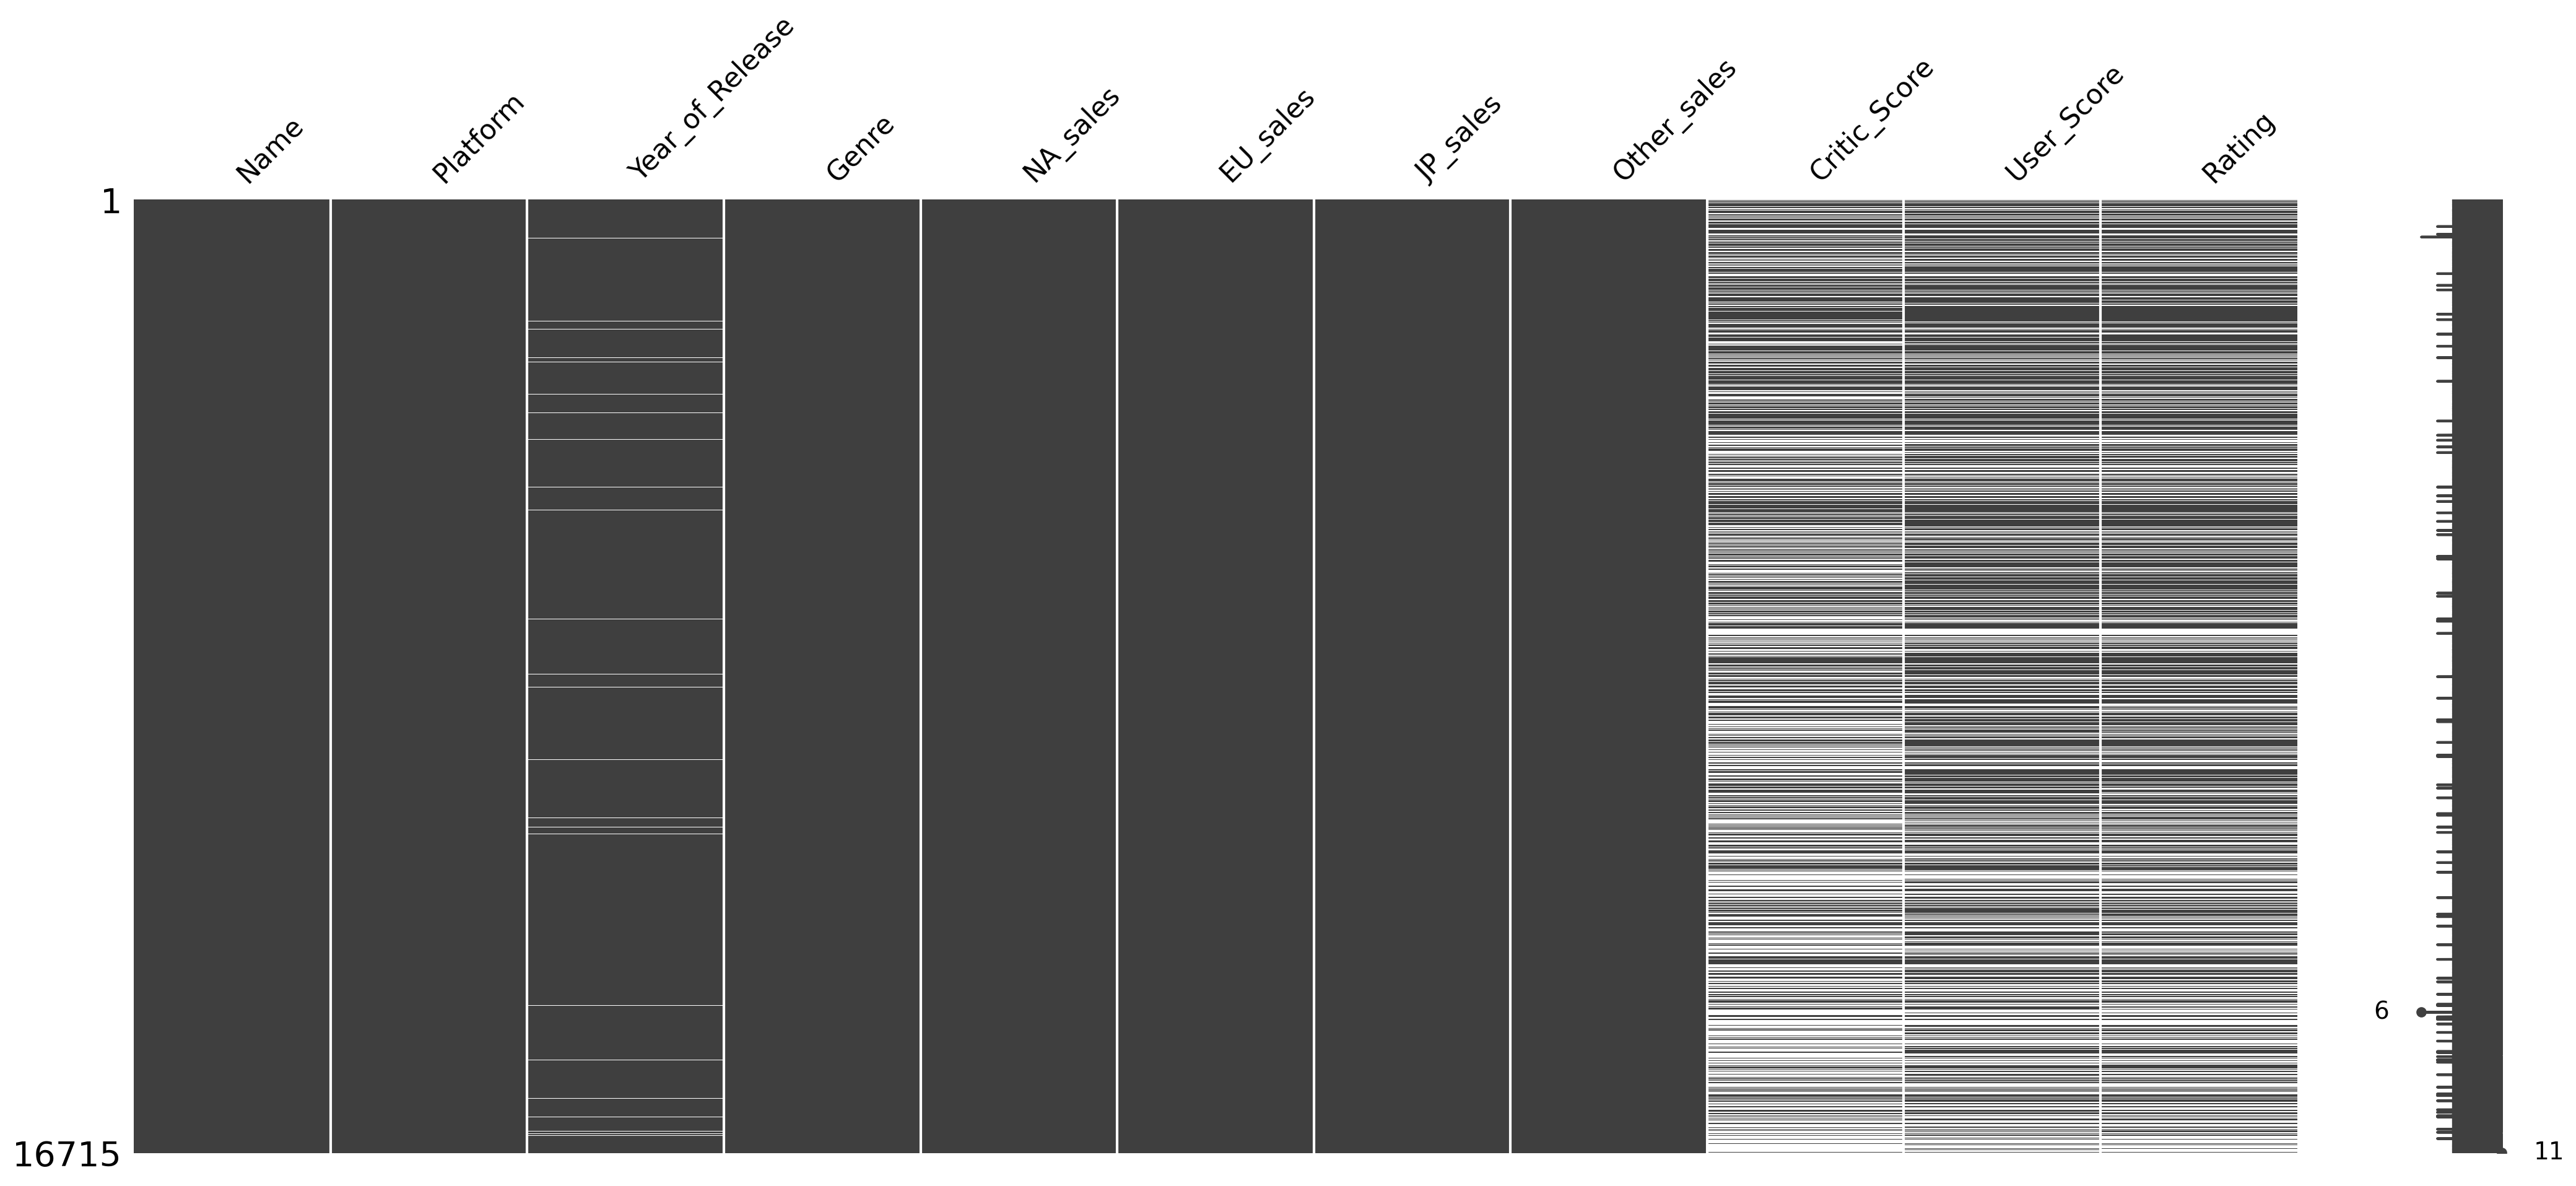

In [8]:
# Посмотрим где именно больше всего пропущенных значений и есть ли в пропусках какая-то закономерность или нет
msno.matrix(data);

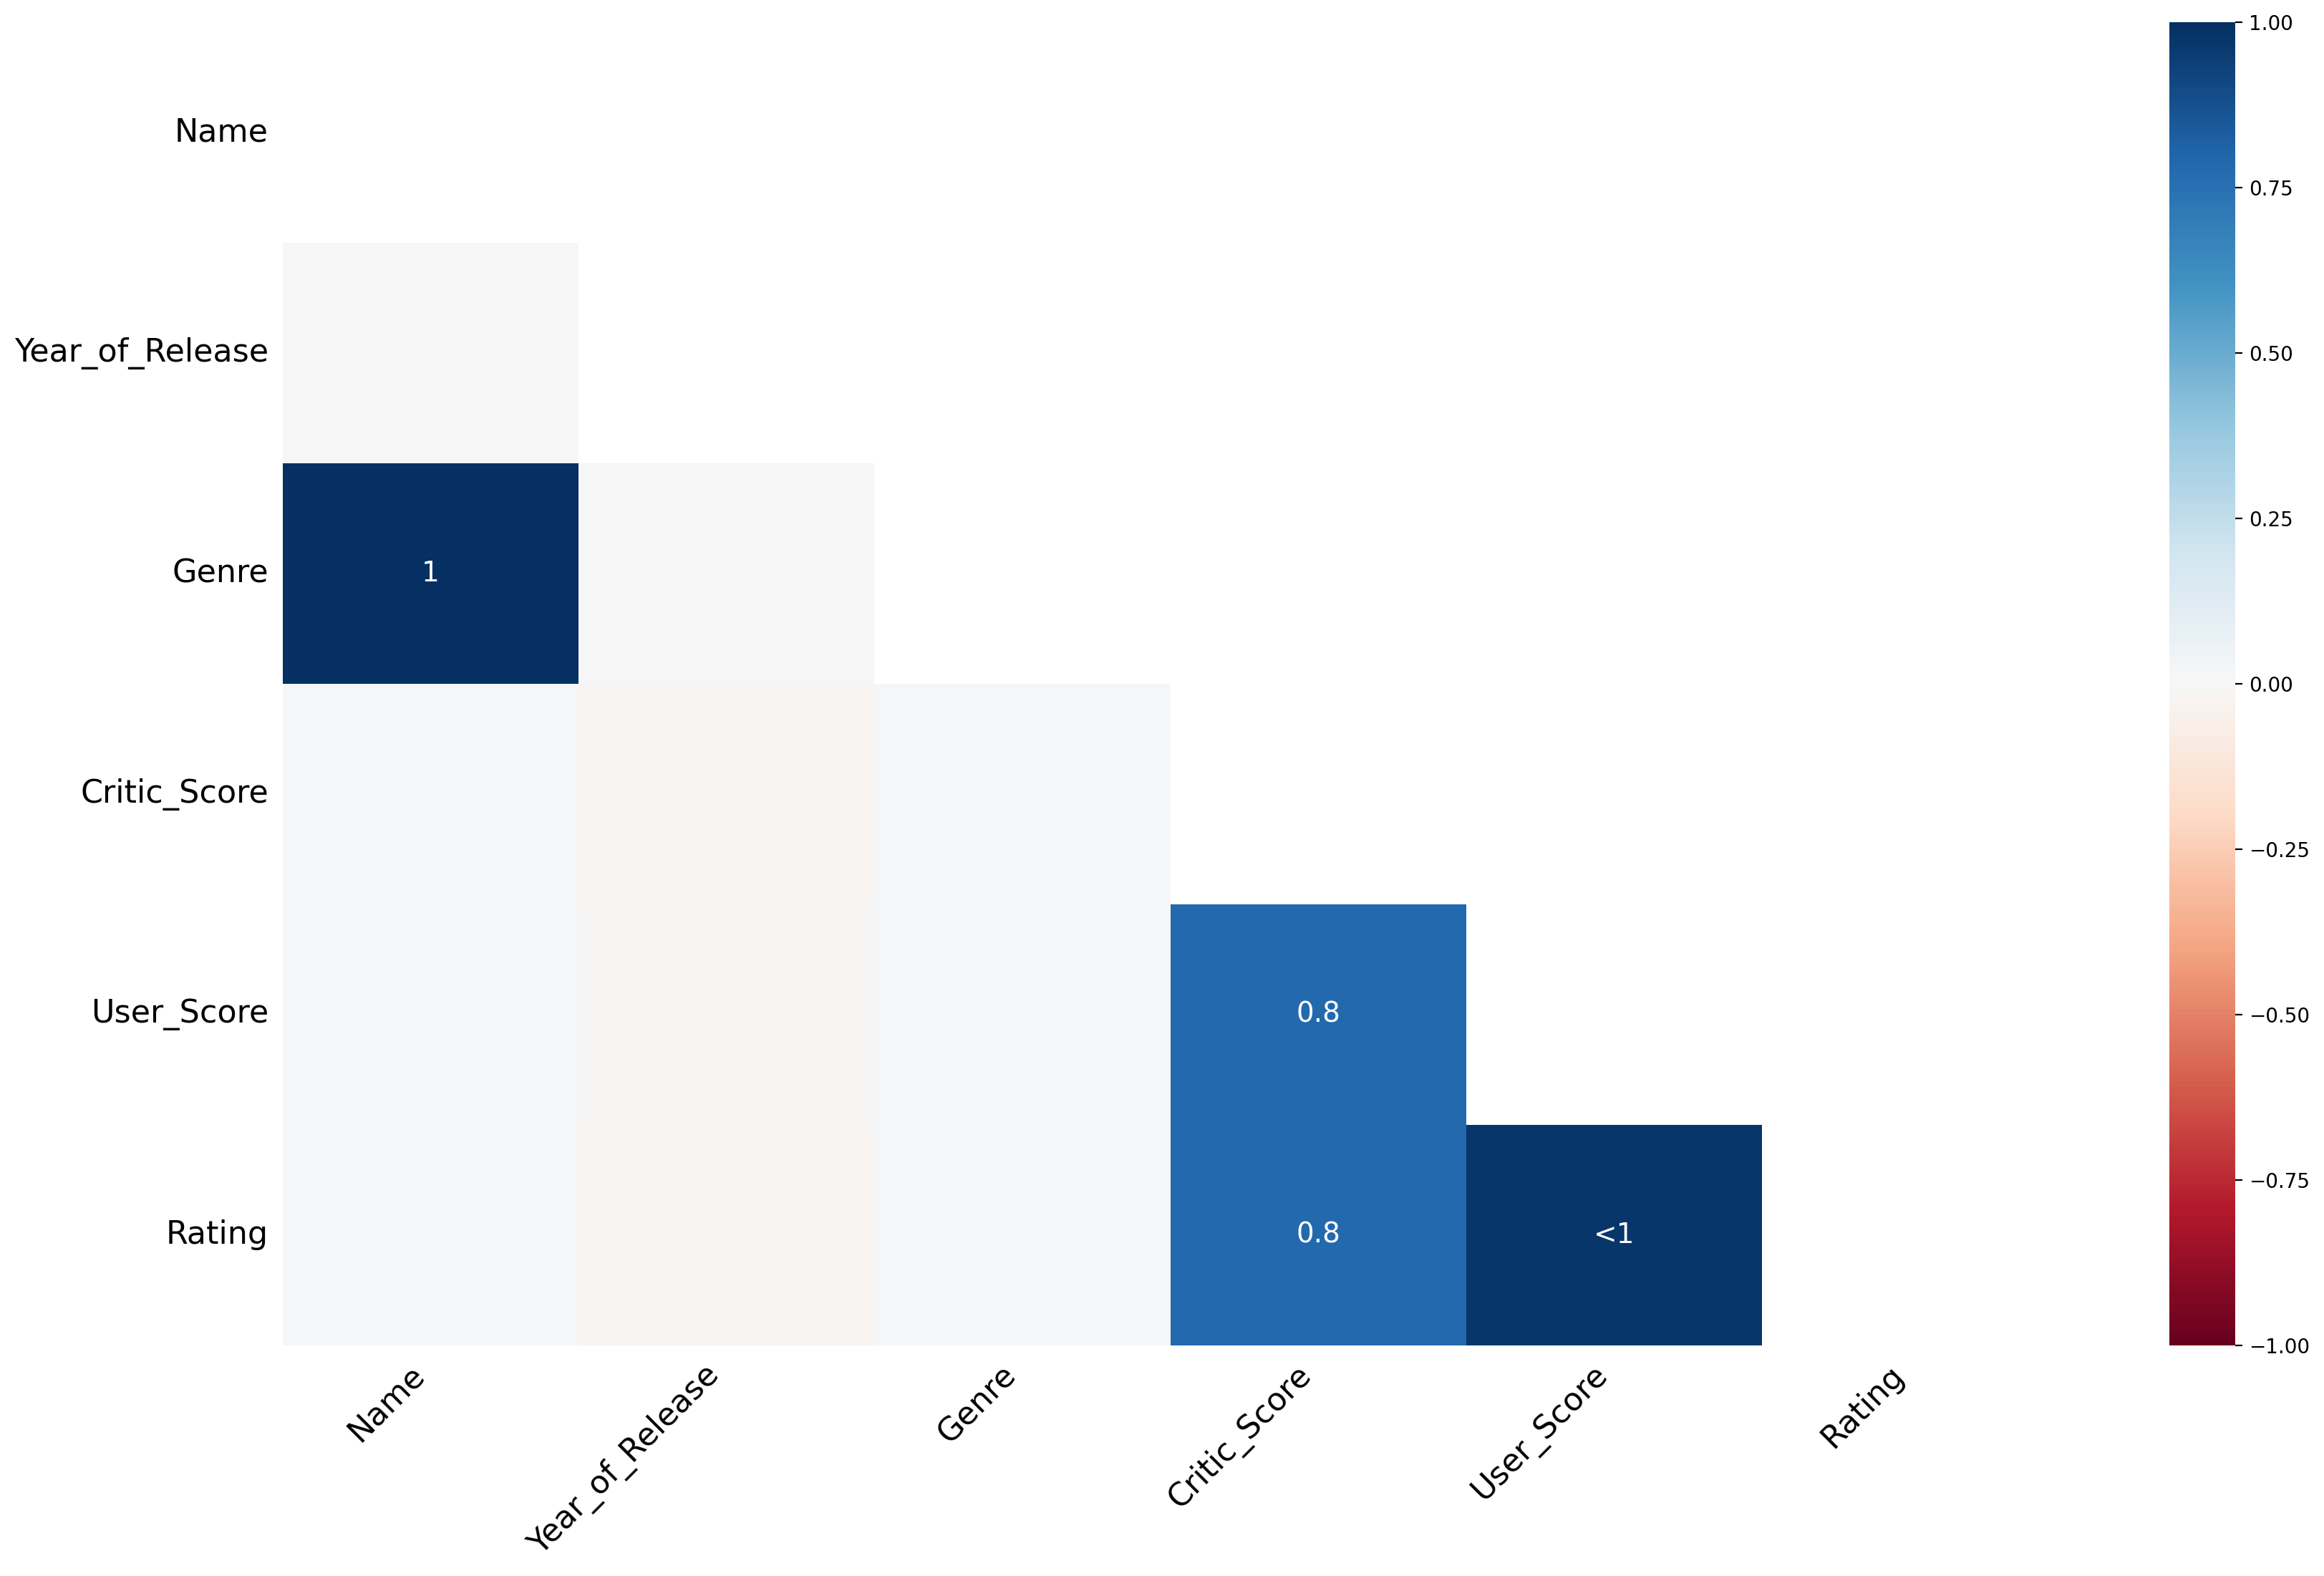

In [9]:
# Матрица корреляции пропущенных значений
msno.heatmap(data);

In [10]:
# Проверим датасет на явные дубликаты
data.duplicated().sum()

0

In [11]:
# Посмотрим описательные статистики
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [12]:
# Посмотрим уникальные значения столбца Platform
print(data['Platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [13]:
# Посмотрим уникальные значения столбца Genre
print(data['Genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


### Вывод
<a id="2_0"></a>

В датафрем `data` загружены данные из файла games.csv. С помощью метода `info()` получена общая информация по данным.<br>

При первичном анализе данных выявлены следующие проблемы:
1. Стилистически неправильные названия столбцов, лучше переименовать их в нижнем регистре.
2. Неверные типы данных, например, `Year_of_Release` должен иметь тип `int`, `User_Score` - `float`.
3. Наличие пропусков в данных, в 6 столбцах есть пропущенные значения. Наибольшее количество пропусков в столбце `Critic_Score` - 51.32%. 
5. По матрице корреляций пропущенных значений можем наблюдать, что в пропусках есть закономерность для столбцов `Critic_Score`, `User_Score`, `Rating`. Пропуски в столбцах `Name` и `Genre` совпадают.
5. Аномалий в данных не обнаружено. 
6. Явных дубликатов нет.

## 3. Предобработка данных 
<a id="3"></a>

Переименуем столбцы в стиле *snake_case*.

In [14]:
# Переименуем столбцы в стиле snake_case
data.columns = data.columns.str.lower()

Переведем значения некот. столбцов в нижний регистр. Это поможет избежать ошибок с неявными дубликатами.

In [15]:
data['name'] = data['name'].str.lower()
data['genre'] = data['genre'].str.lower()

### 3.1. Обработка пропусков.
<a id="3_1"></a>
В 6 столбцах есть пропущенные значения, проанализируем причины и методы обработки пропусков:

**`name`: 2 пропуска (00.01%) и `genre`: 2 пропуска (00.01%).** Данные этих столбцов важны для исследования. Заполнить значения нечем, но так как количество пропусков всего 00.01% от датасета, можем удалить пропуски.<br>
**`year_of_release`: 269 пропусков (01.61%).** Данные этого столбца важны для исследования. Подробнее изучив пропущенные значения выяснили, что некоторые пропуски можно заполнить с помощью информации в других строках таблицы об этой игре. Эти пропуски появились из-за некачественного сбора данных. Скорее всего остальные пропуски появились из-за отсутствия в открытых данных нужной информации, заполнить их нечем, оставим их.<br>
**`critic_score`: 8578 пропусков (51.32%).** Данные этого столбца важны для исследования. Скорее всего в открытых источниках нет информации об оценках критиков для некоторых игр. При этом не все игры оцениваются критиками, поэтому для некоторых игр такой информации просто нет. Заполнить значения нечем, оставим пропуски.<br>
**`user_score`: 6701 пропусков (40.09%).** Данные этого столбца важны для исследования. Скорее всего в открытых источниках нет информации об оценках и рейтинге для некоторых игр. Заполнить значения нечем, оставим пропуски.<br>
**`rating`: 6766 пропусков (40.48%).** Данные этого столбца важны для исследования. Скорее всего в открытых источниках нет информации о рейтинге для некоторых игр. ESRB была основана в 1994 году, соответственно, далеко не всем играм, выпущенным до этого года, присуждался рейтинг. Заполним пустые значения специальным словом undefined.<br>

In [16]:
# Посмотрим на пропущенные значения в столбце name и genre.
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [17]:
# Удалим пропущенные значения в столбце name и genre
data = data[~data['name'].isna()]

In [18]:
# Посмотрим на пропущенные значения в столбце year_of_release.
data[data['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,X360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,GBA,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,lego indiana jones: the original adventures,Wii,NaN,action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,call of duty 3,Wii,NaN,shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,rock band,Wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [19]:
# Lego Batman точно выпускался на других платформах тоже, можно проверить наличие значений в других записях об этой игре
data[data['name']=='lego batman: the videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,lego batman: the videogame,X360,2008.0,action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,lego batman: the videogame,Wii,NaN,action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,lego batman: the videogame,DS,2008.0,action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,lego batman: the videogame,PS3,2008.0,action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,lego batman: the videogame,PSP,NaN,action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,lego batman: the videogame,PS2,2008.0,action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,lego batman: the videogame,PC,2008.0,action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [20]:
# Бинго
# Заполним пропущенные значения в столбце year_of_release, ориентируясь на записи таблицы с этой же игрой
for game_name in data[data['year_of_release'].isna()]['name'].unique():  
    data.loc[(data['name'] == game_name) & (data['year_of_release'].isna()), 'year_of_release'] = \
    data.loc[(data['name'] == game_name) & (~data['year_of_release'].isna()), 'year_of_release'].max()

In [21]:
# Посмотрим остались ли пропущенные значения
data['year_of_release'].isna().sum()

146

In [22]:
# Удалим оставшиеся пропущенные значения
data = data[~data['year_of_release'].isna()]

In [23]:
# Посмотрим на пропущенные значения в столбце critic_score.
data[data['critic_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,GB,1999.0,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,SNES,1990.0,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,DS,2006.0,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,GB,1989.0,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,NES,1988.0,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [24]:
# Посмотрим на пропущенные значения в столбце user_score.
data[data['user_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,GB,1999.0,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,SNES,1990.0,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,DS,2006.0,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,GB,1989.0,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,NES,1988.0,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [25]:
# Посмотрим на пропущенные значения в столбце rating.
data[data['rating'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,GB,1999.0,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,SNES,1990.0,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,DS,2006.0,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,GB,1989.0,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,NES,1988.0,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [26]:
# Заполним пропущенные значения заглушкой
data['rating'] = data['rating'].fillna('undefined')

In [27]:
# Проверка изменений
data_null = data.isna()
data_null.apply(['sum', 'mean']).T.style.format({'sum':'{:.0f}','mean':'{:.2%}'}).background_gradient(cmap='Blues', axis=0)

,sum,mean
name,0,0.00%
platform,0,0.00%
year_of_release,0,0.00%
genre,0,0.00%
na_sales,0,0.00%
eu_sales,0,0.00%
jp_sales,0,0.00%
other_sales,0,0.00%
critic_score,8492,51.26%
user_score,6633,40.04%


### 3.2. Изменение типов данных.
<a id="3_2"></a>

In [28]:
# Изменим тип данных в столбце year_of_release на целочисленный
data['year_of_release'] = data['year_of_release'].astype('Int32')

Обратим внимание,в столбце user_score есть специальное значение заглушка tbd. **TBD** (To Be Determined) – это обозначение, которое можно увидеть рядом с рейтингом игры на различных игровых платформах. Оно указывает на то, что рейтинг данной игры еще не определен и находится в процессе определения. Чтобы избежать ошибки при изменении типа данных этого столбца изменим значение tbd на Nan.

In [29]:
# Заменим tbd на Nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
# Изменим тип данных в столбце user_score на числовой
data['user_score'] = data['user_score'].astype('float')

In [30]:
# Столбец critic_score имеет целочисленные значения
# data['critic_score'].unique()
# Изменим тип данных в столбце critic_score на целочисленный
data['critic_score'] = data['critic_score'].astype('Int32')

In [31]:
# Проверка изменений
# data.info()
# data.head()

### 3.3. Обработка дубликатов.
<a id="3_3"></a>
Явных дубликатов в датасете нет. Проверим наличие неявных дубликатов.

In [32]:
data.duplicated().sum()

0

Проверим наличие дубликатов по параметрам "название игры - платформа - год".

In [33]:
print(data[['name', 'platform', 'year_of_release']].duplicated().sum())
data[data[['name', 'platform', 'year_of_release']].duplicated() == True]

2


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4127,sonic the hedgehog,PS3,2006,platform,0.0,0.48,0.0,0.0,43,4.1,E10+
16230,madden nfl 13,PS3,2012,sports,0.0,0.01,0.0,0.0,83,5.5,E


In [34]:
display(data[(data['name']=='sonic the hedgehog') & (data['platform']=='PS3')])
# ОЧЕНЬ смущают продажи в Европе
# удалим дубликаты, оставив первую строчку, так как она скорее всего отражает истинную информацию
data = data.drop(index = 4127)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,sonic the hedgehog,PS3,2006,platform,0.41,0.06,0.04,0.66,43,4.1,E10+
4127,sonic the hedgehog,PS3,2006,platform,0.00,0.48,0.00,0.00,43,4.1,E10+


In [35]:
display(data[(data['name']=='madden nfl 13') & (data['platform']=='PS3')])
# удалим дубликаты, оставив первую строчку, так как она скорее всего отражает истинную информацию
data = data.drop(index = 16230) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012,sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,madden nfl 13,PS3,2012,sports,0.00,0.01,0.0,0.00,83,5.5,E


Проверим наличие дубликатов названий платформ.

In [36]:
# Посмотрим уникальные значения столбца platform
print(data['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Проверим наличие дубликатов названий жанров.

In [37]:
# Посмотрим уникальные значения столбца genre
print(data['genre'].unique())

['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy']


Проверим наличие дубликатов обозначений рейтинга.

In [38]:
# Посмотрим уникальные значения столбца rating
print(data['rating'].unique())

['E' 'undefined' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Изучив обозначения рейтинга <a href='https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board'> ESRB</a>, заметим, что обозначение K-A это устаревшее обозначение рейтинга E. Оно использовалось до 1998 года. Так как оба обозначения это одна возрастная группа, будем считать K-A (подходит для всех возрастов) неявным дубликатом и переобозначим его современным рейтингом E (подходит для всех возрастов).<br>

Следующие рейтинги мы переобозначим и объединим в более много численную группу, так как в них очень мало значений:<br>
Возрастную группу AO (подходит для взрослых старше 18 лет) можно переобозначить рейтингом M (подходит для лиц старше 17 лет.), таким образом объединив их.<br>
Возрастную группу RT (Рейтинг ожидается - примерно 17+) можно переобозначить рейтингом M (подходит для лиц старше 17 лет.), таким образом объединив их.<br>

In [39]:
data.loc[data['rating']=='K-A', 'rating'] = 'E'
data.loc[data['rating']=='AO', 'rating'] = 'M'
data.loc[data['rating']=='RP', 'rating'] = 'M'

### 3.4. Обработка аномальных значений.
<a id="3_4"></a> 

In [40]:
# Посмотрим описательные статистики
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16565.0,2006.491579,5.862436,1980.0,2003.0,2007.0,2010.0,2016.0
na_sales,16565.0,0.264007,0.816518,0.0,0.0,0.08,0.24,41.36
eu_sales,16565.0,0.145802,0.505387,0.0,0.0,0.02,0.11,28.96
jp_sales,16565.0,0.07803,0.310086,0.0,0.0,0.0,0.04,10.22
other_sales,16565.0,0.047573,0.187487,0.0,0.0,0.01,0.03,10.57
critic_score,8073.0,68.993435,13.921229,13.0,60.0,71.0,79.0,98.0
user_score,7538.0,7.125643,1.497931,0.0,6.4,7.5,8.2,9.7


In [41]:
data['rating'].value_counts()

rating
undefined    6699
E            3960
T            2930
M            1557
E10+         1411
EC              8
Name: count, dtype: int64

In [42]:
data['genre'].value_counts()

genre
action          3342
sports          2332
misc            1735
role-playing    1484
shooter         1311
adventure       1294
racing          1236
platform         878
simulation       860
fighting         842
strategy         678
puzzle           573
Name: count, dtype: int64

Аномальных значений не обнаружено.

### 3.5. Дополнительные параметры.
<a id="3_5"></a>
Добавим дополнительный параметр в датасет:
`total_sales` - суммарные продажи во всех регионах (миллионы проданных копий).

In [43]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,undefined,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,undefined,31.38


### Вывод
<a id="3_0"></a>
При предобработке данных выполнены следующие действия:
1. Названия столбцов приведены в нижний регистр в соответсвии со стилем *snake_case*.
2. В столбцах `name` и `genre` все значения приведены к нижнему регистру, чтобы избежать ошибок с неявными дубликатами.
2. В столбцах `name` и `genre` пропущенные значения удалены из датасета. В столбце `year_of_release` пропущенные значения заполнены на основе информации в других строках таблицы об этой игре, где это возможно. В столбце `rating` пропущенные значения заполнены специальным словом undefined.
3. В столбце`year_of_release` изменен тип данных на Int. В стобце `user_score` специальное значение tbd заменено на Nan и тип данных изменен на Int. В стобце `critic_score` тип данных изменен на Int.
4. Обработаны неявные дубликаты в столбце `rating`, обозначения рейтинга приаедены к современному стилю. Явных дубликатов нет.
5. Аномальных значений нет.
7. В датасет добавлен новый столбец `total_sales` - суммарные продажи во всех регионах (миллионы проданных копий).

## 4. Исследовательский анализ данных
<a id="4"></a>

### 4.1. Год выпуска игры.
<a id="4_1"></a>
Посмотрим, сколько игр выпускалось в разные годы. 

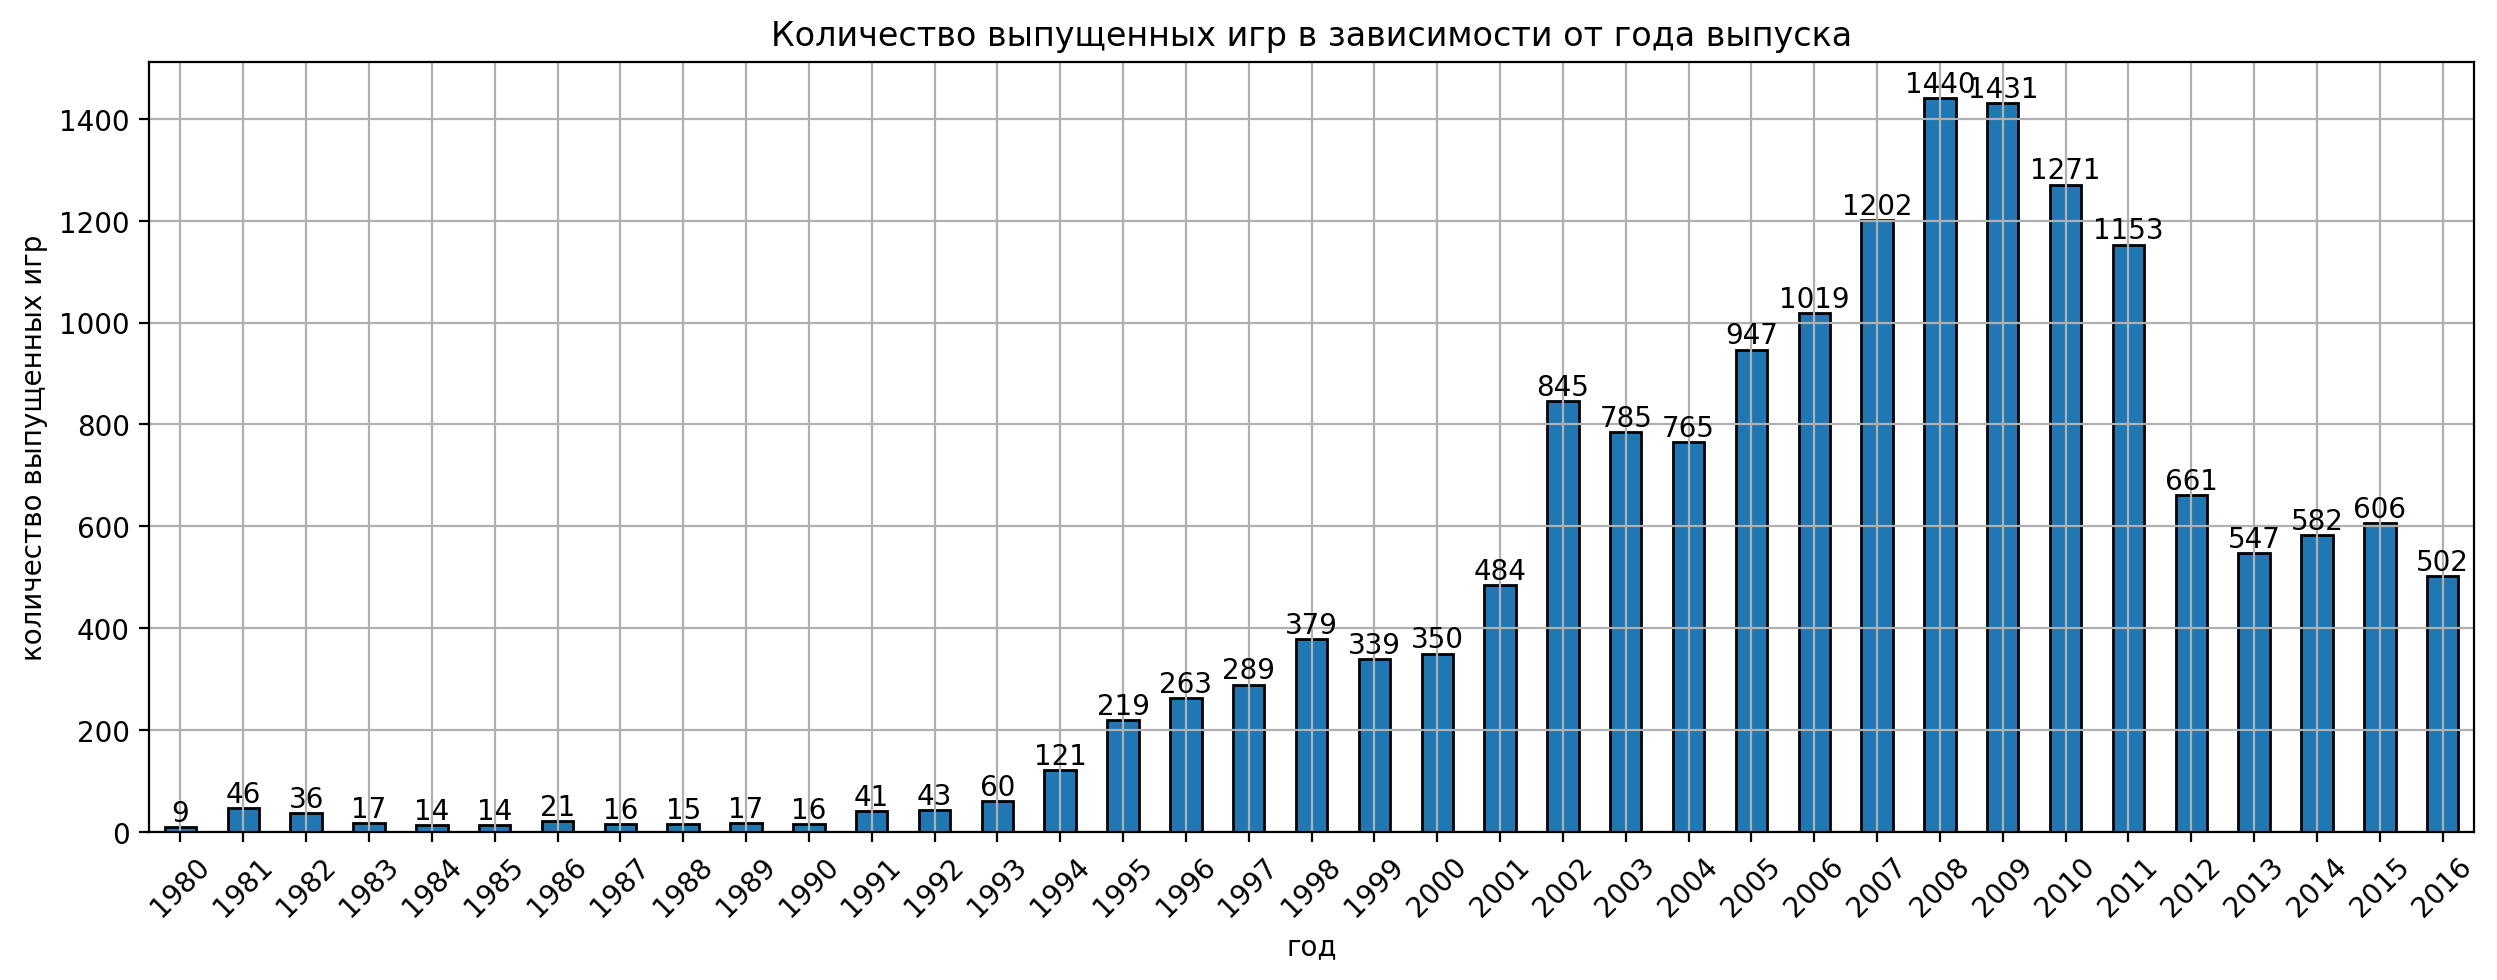

In [44]:
ax = data['year_of_release'].value_counts().sort_index().plot(kind='bar', y='count', grid=True, ec='black', figsize=(15, 5))
plt.title('Количество выпущенных игр в зависимости от года выпуска')
plt.xlabel('год')
plt.ylabel('количество выпущенных игр')
plt.xticks(rotation=45)
plt.bar_label(ax.containers[0])
plt.show();

**Вывод:**

До 1994 года индустрии игр практически нет, в год выпускается менее 50 игр. 

Бум начается в 1994 году, в это время на рынок вышло множество игровых платформ, включая Sony PlayStation (PS) и персональные компьютеры (PC). Индустрия игр начинает быстро развиваться выпуская все больше игр, она становится популярной. Пока рынок рос и получал новые рынки сбыта, постоянный приток инвестиций позволял экспериментировать и даже рисковать. Период с 2002 по 2008 год для игровой индустрии был настоящей золотой эпохой. Именно на это время пришёлся переход в полноценное 3D, а вскоре появилась реалистичная физика, анимация и эффекты. С 2005 по 2008 год индустрия росла на 10% ежегодно.

Далее Мировой Экономический Кризис 2008-го года вынудил многих издателей сократить расходы и, как следствие, закрыть ряд перспективных проектов. Количество выпускаемых игр сокращается. Игры становятся дорогим удовольствием. 

Тогда же начали стремительно расти мобильные игры. Поскольку в новых условиях многие были не готовы бежать за новой дорогой консолью, а вот смартфоны, которые после выхода iPhone заняли важнейшее место, приобретали популярность. Это всё привело к тому, что интерес к компьютерным играм упал, соответственно, упало и их производство. С 2012 года индутрия консольных компьютерных игр резко снижается и выходит на плато. 

### 4.2. Игровая платформа.
<a id="4_2"></a>

**Посмотрим, как менялись продажи по платформам.**

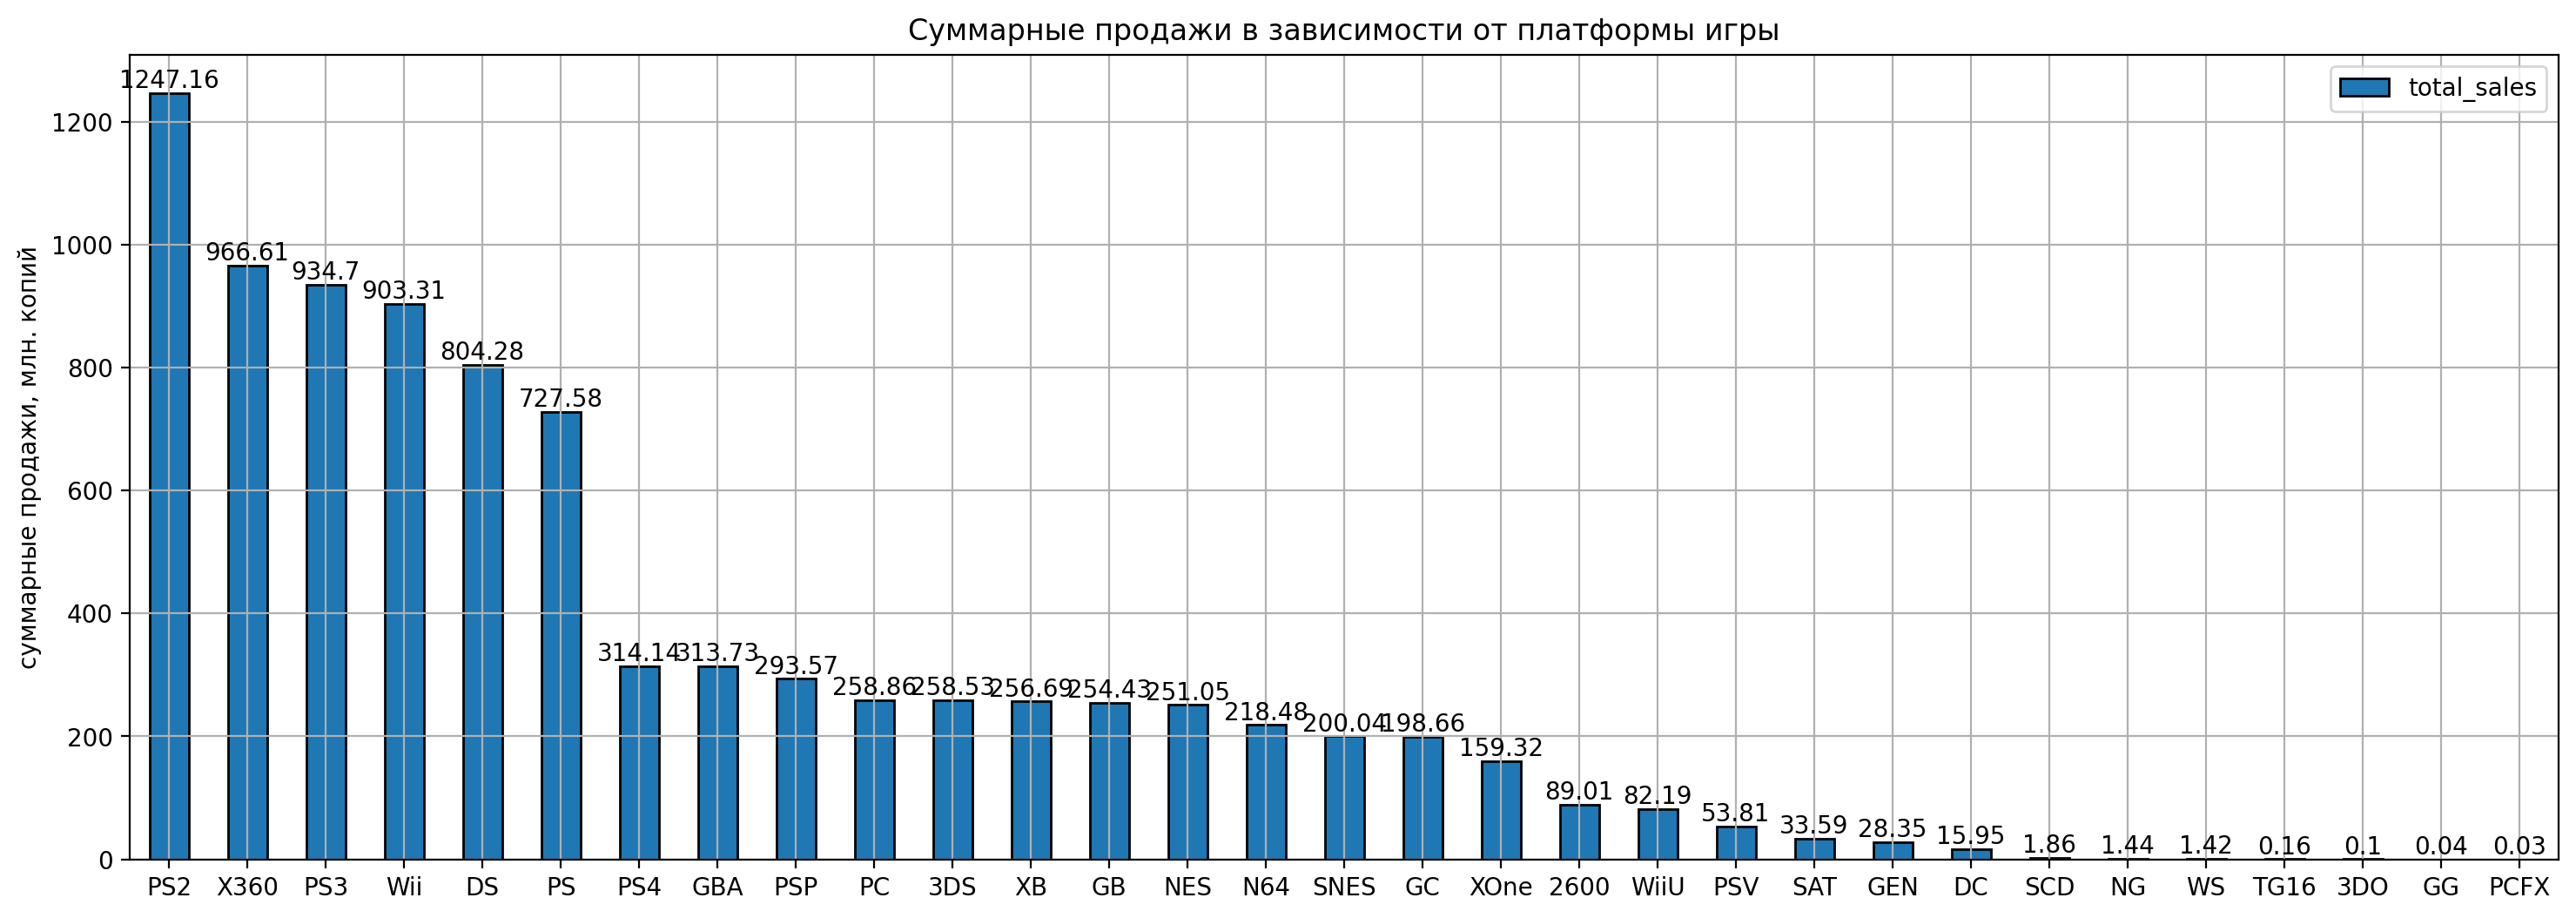

In [45]:
ax = (data
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales', grid=True, ec='black', figsize=(18, 6)))   
plt.title('Cуммарные продажи в зависимости от платформы игры')
plt.xlabel('')
plt.ylabel('cуммарные продажи, млн. копий')
plt.xticks(rotation = 0)
plt.bar_label(ax.containers[0])
plt.show();

**Вывод:**

Самые популярные игровые платформы за весь период до 2016 года это:
- Sony PlayStation 2 (PS2)
- Xbox 360 (X360)
- Sony PlayStation (PS3) 
- Nintendo Wii (Wii)
- Nintendo DS (DS) 
- Sony PlayStation (PS)

На рынке игровых платформ четкое преобладание компаний Sony, Nintendo и Microsoft.

**Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.**

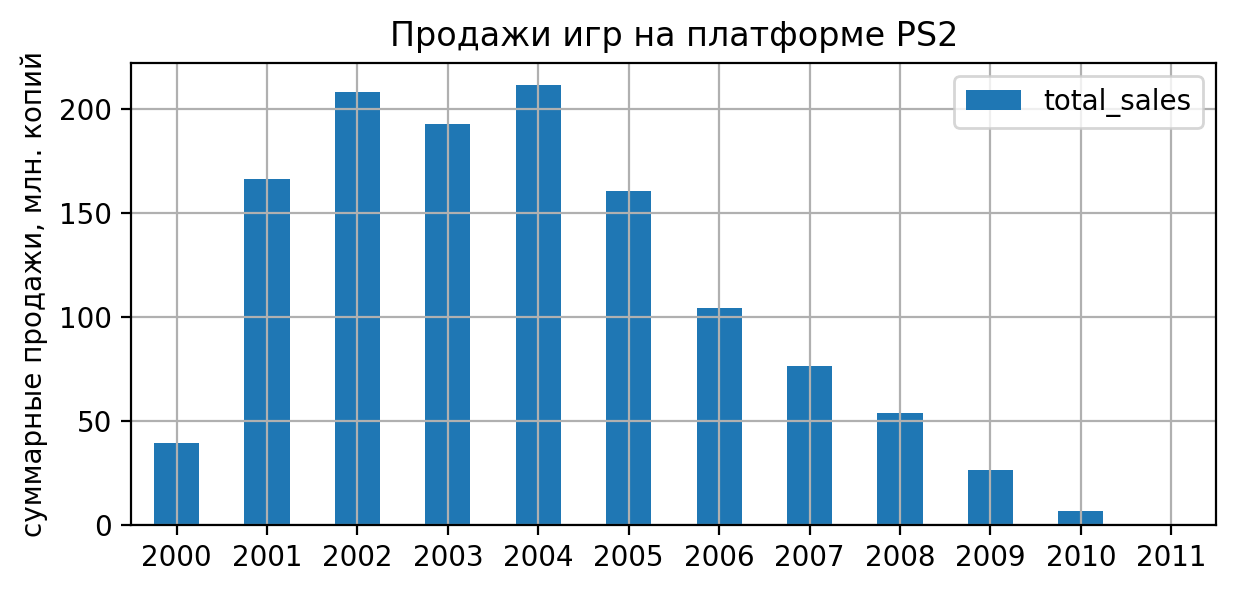

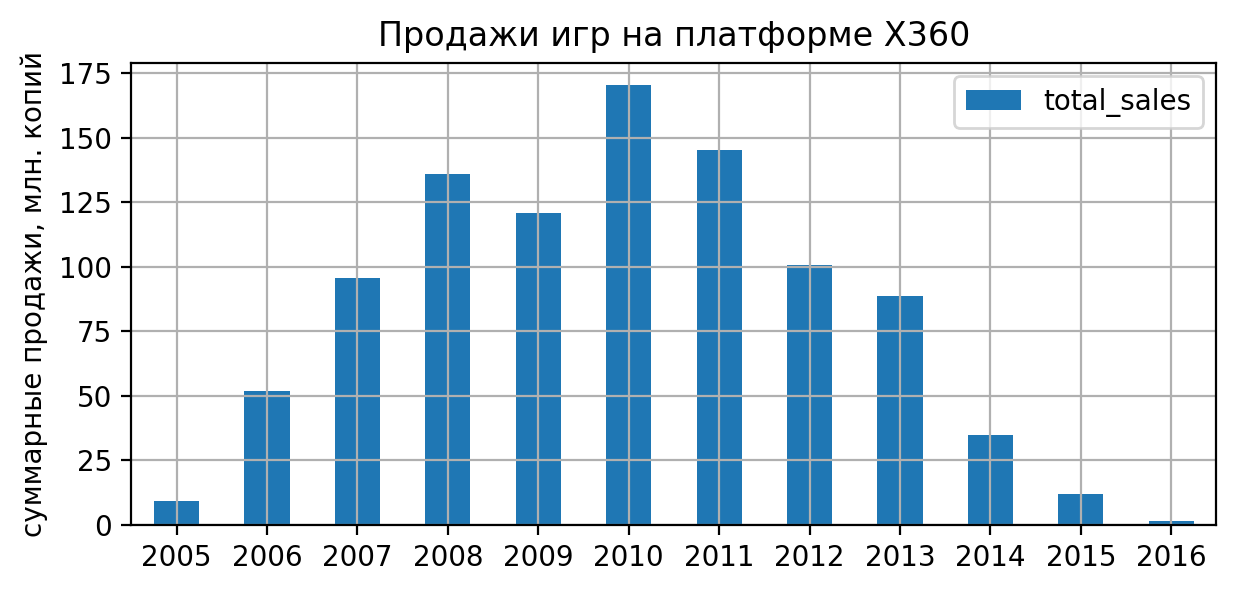

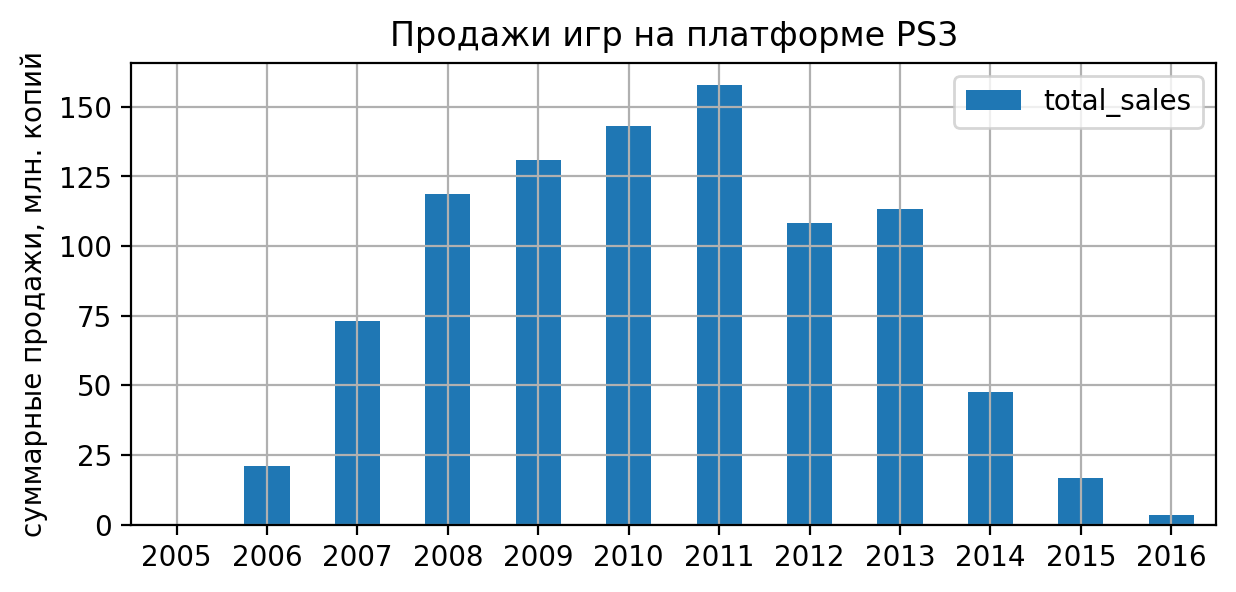

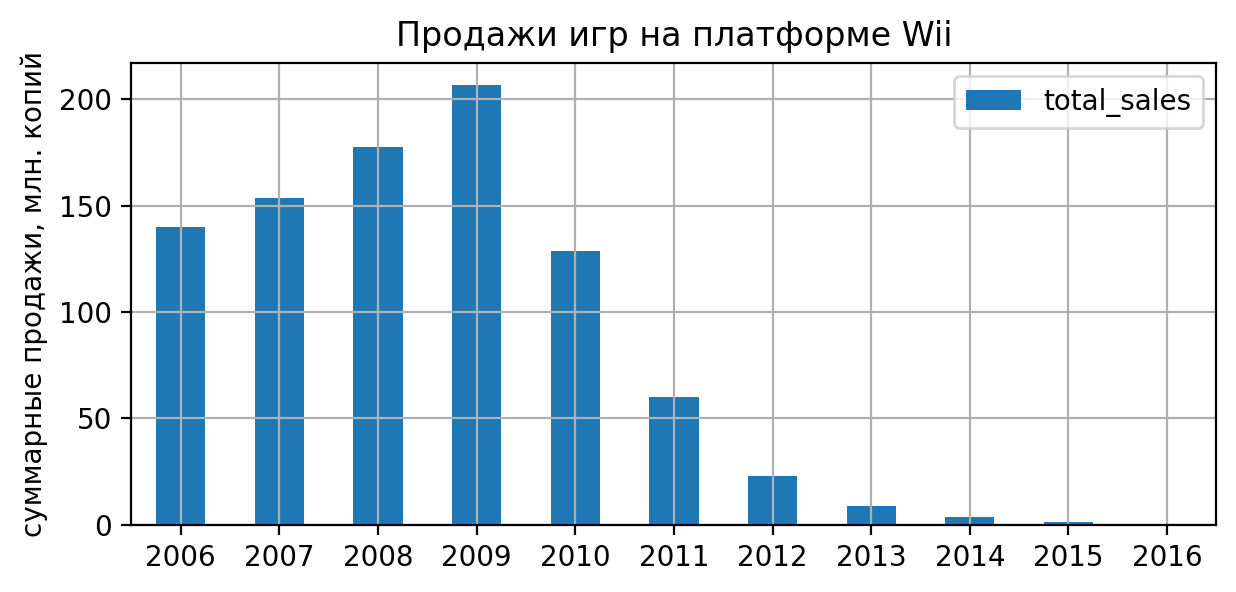

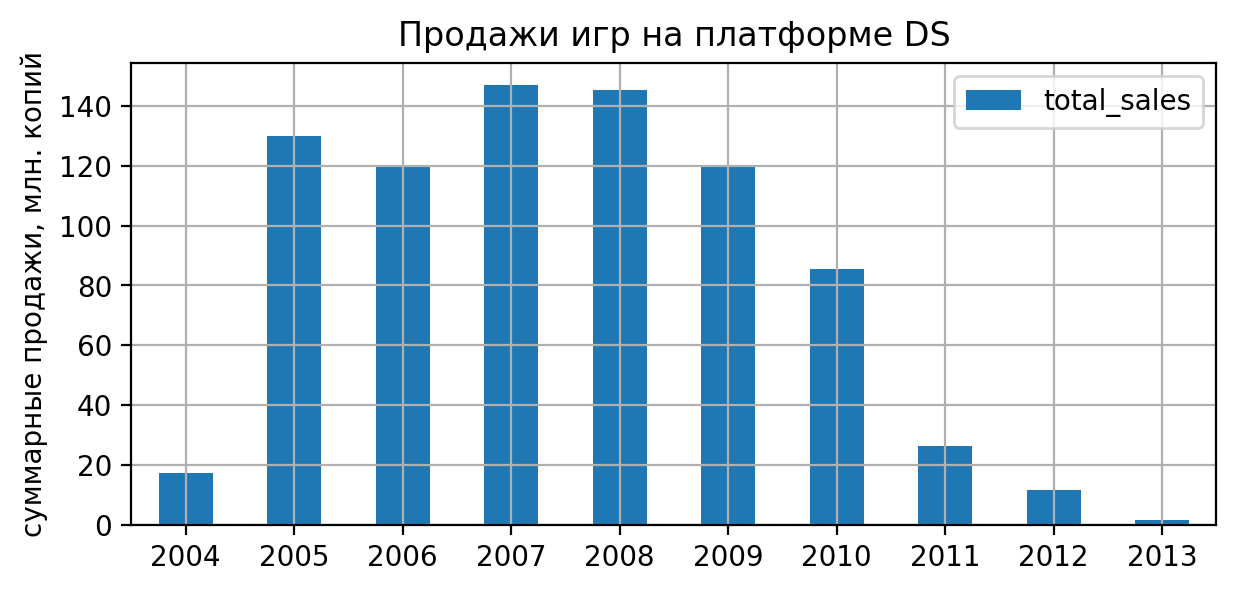

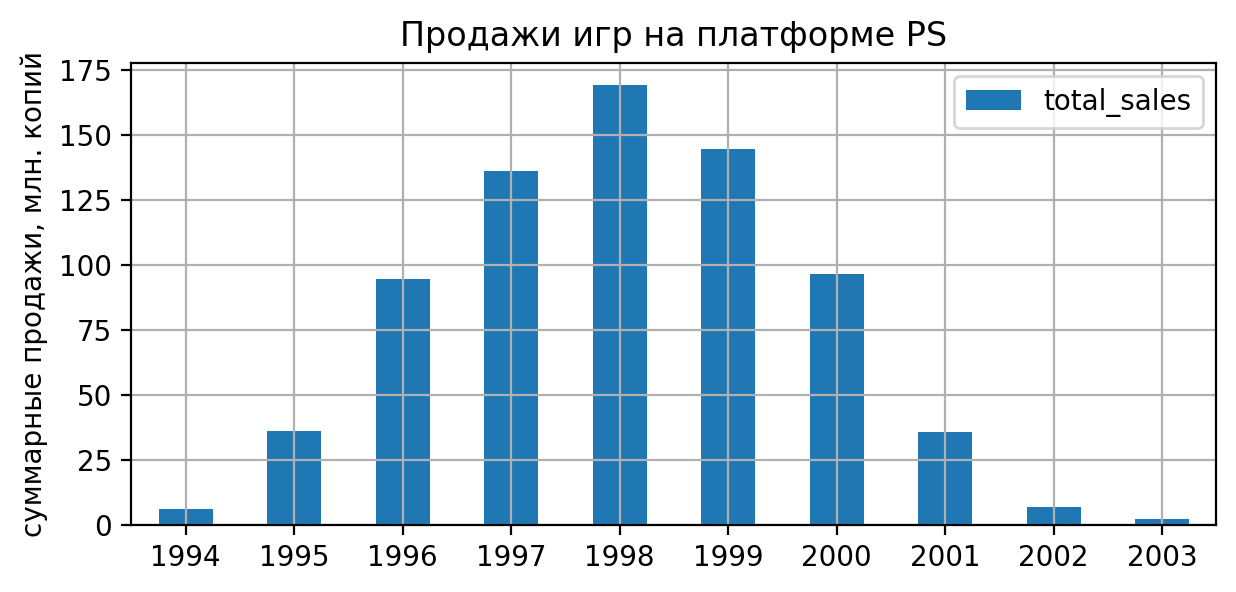

In [46]:
# Оставим данные начиная с 1994 года, именно с этого момента начинается рост индустрии видеоигр
temp_data = data[data['year_of_release'] >= 1994]

top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

# Посмотрим, как менялись продажи по платформам. Построим распределения по годам для каждой платформы.
for platform in top_platforms:
    (temp_data[temp_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar', figsize=(7,3), grid=True))
    plt.title(f"Продажи игр на платформе {platform}")
    plt.xlabel('')
    plt.ylabel('cуммарные продажи, млн. копий')
    plt.xticks(rotation = 0)
    plt.show();

**Вывод:**

Каждая из наиболее платформ была актульна примерно по 10 лет:
- Sony PlayStation 2 (PS2) с 2000 по 2010 (10 лет)
- Xbox 360 (X360) с 2005 по 2016 (11 лет)
- Nintendo Wii (Wii) c 2006 по 2016 (10 лет)
- Nintendo DS (DS) с 2004 по 2013 (9 лет)
- Sony PlayStation (PS) c 1994 по 2003 (9 лет)

В среднем консоль остается актуальной в течении примерно 10 лет. У каждой консоли наблюдаются периоды роста (примерно первые 5 лет) и постепенного спада. Это естественный процесс с течением времени консоль устаревает как морально, так и по техническим характеристикам.

### 4.3. Исследование актуального периода.  Прогноз на 2017 год.
<a id="4_3"></a>
Далее в работе будем опираться на данные за **актуальный период**. Эти данные помогут построить прогноз на 2017 год.

#### Определим актуальный период.

Так как прогноз строится на 2017 год, наиболее актуальными данными будут за период с 2013 года, когда индутрия игр выровнялась от своего взлета и падения.

In [47]:
# возьмем срез данных после 2012 года
target_data = data[data['year_of_release'] >= 2013]

Ориентируясь на исследование проведенное выше, можно убрать из рассмотрения платформы, которые уже потеряли свою актуальность, а именно, PS3, X360, Wii, DS, PSP. Им на смену уже пришли новые версии, потому их срок жизни подходит к концу.

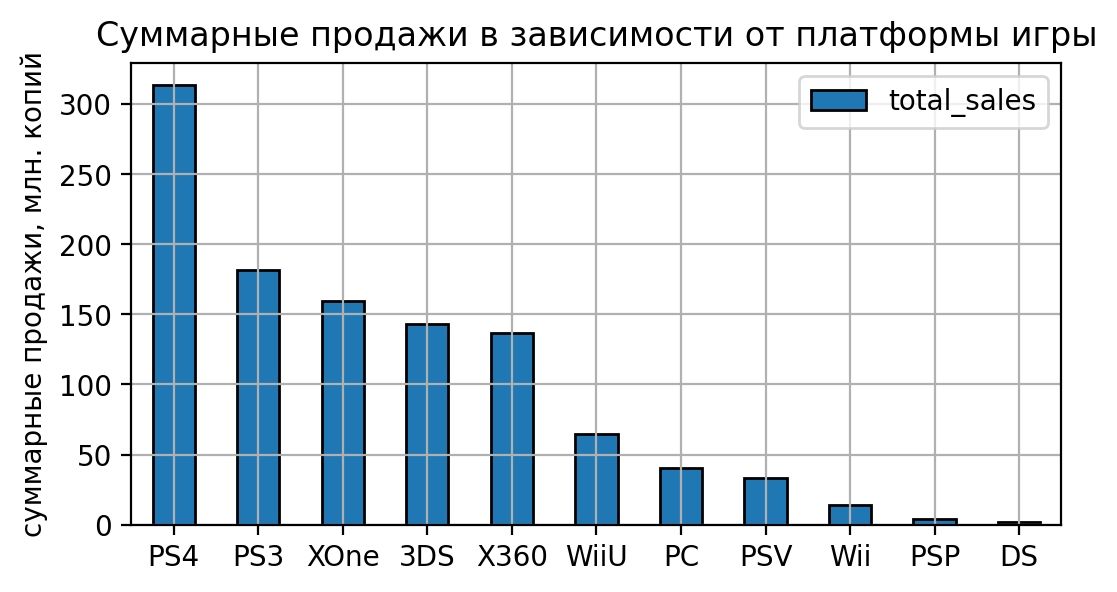

In [48]:
(target_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales', grid=True, ec='black', figsize=(6, 3)))   
plt.title('Cуммарные продажи в зависимости от платформы игры')
plt.xlabel('')
plt.ylabel('cуммарные продажи, млн. копий')
plt.xticks(rotation = 0)
plt.show();

In [49]:
# возьмем срез данных с актуальными игровыми платформами
target_data = target_data[target_data['platform'].isin(['PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV'])]

**Вывод**

Рассматриваемый актуальный период это данные начиная с 2013г. по 2016г. по актуальным игровым платформам: Sony PlayStation 4, Xbox One, Nintendo Wii U, Nintendo 3DS, Sony PlayStation Vita и Персональный компьютер.

#### Определим какие платформы лидируют по продажам. Выделим потенциально прибыльные платформы.

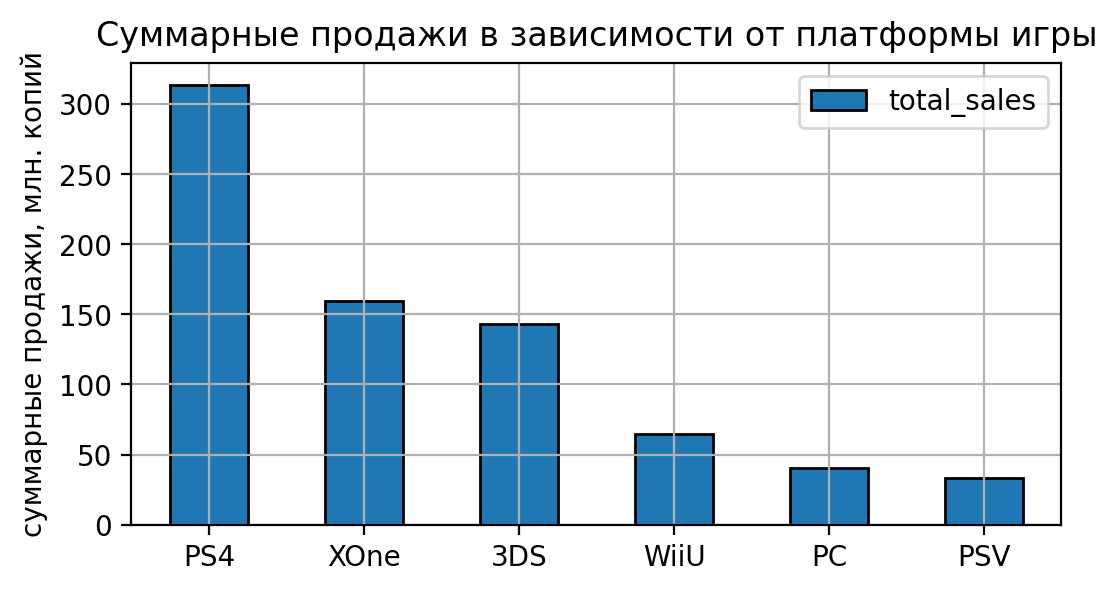

In [50]:
ax = (target_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
      .sort_values('total_sales', ascending=False)
      .plot(kind='bar', y='total_sales', grid=True, ec='black', figsize=(6, 3)))   
plt.title('Cуммарные продажи в зависимости от платформы игры')
plt.xlabel('')
plt.ylabel('cуммарные продажи, млн. копий')
plt.xticks(rotation = 0)
plt.show();

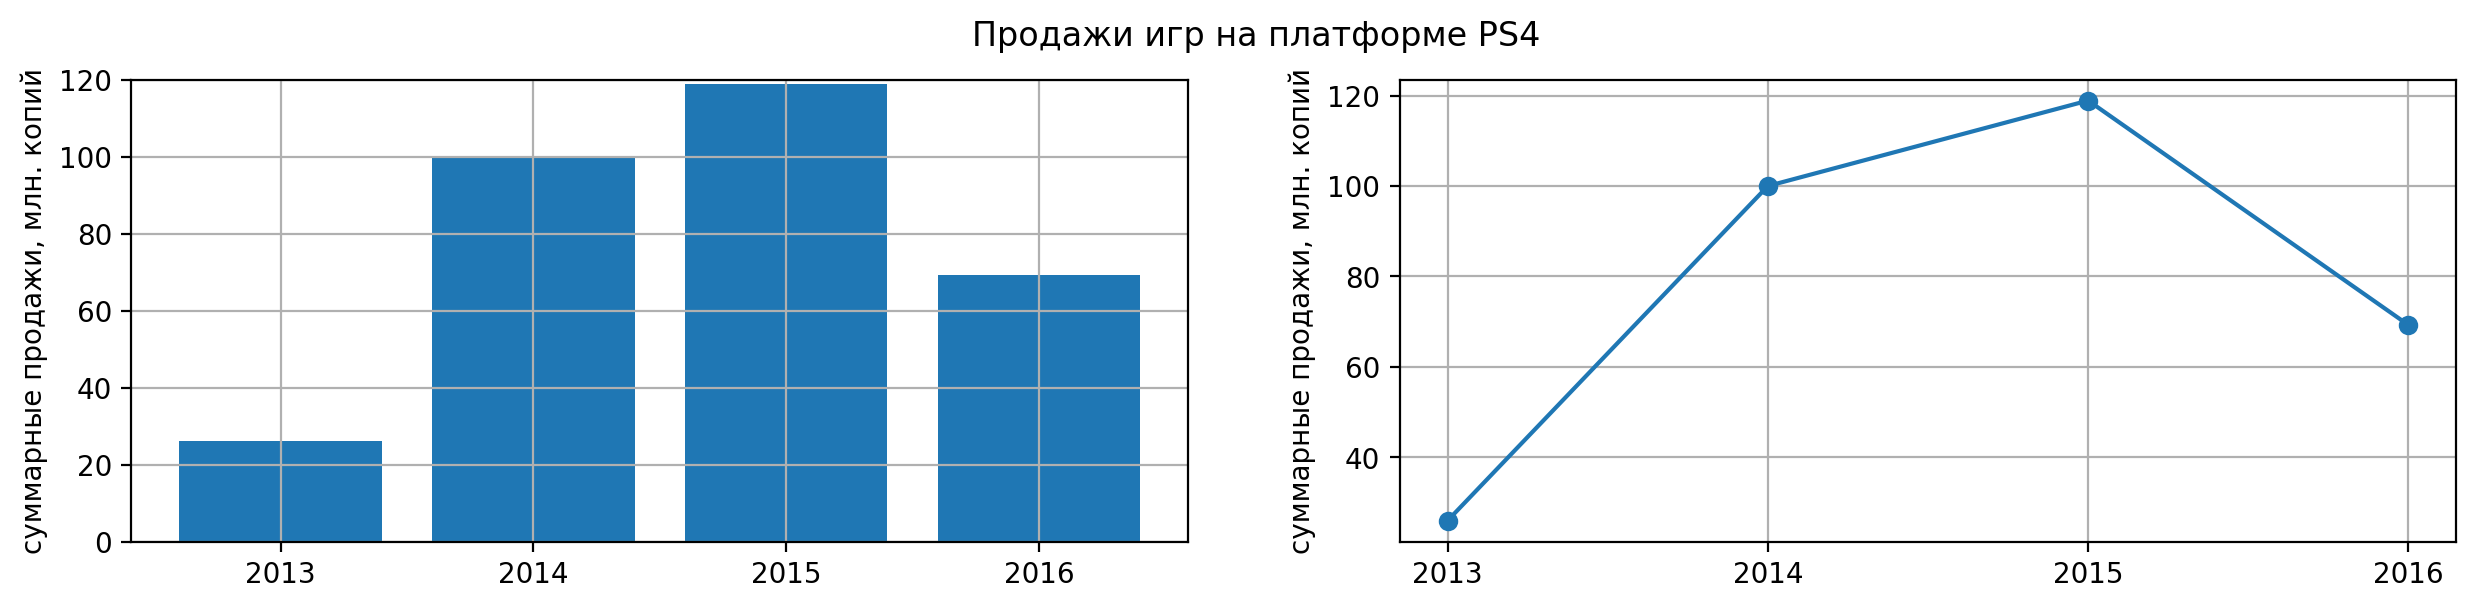

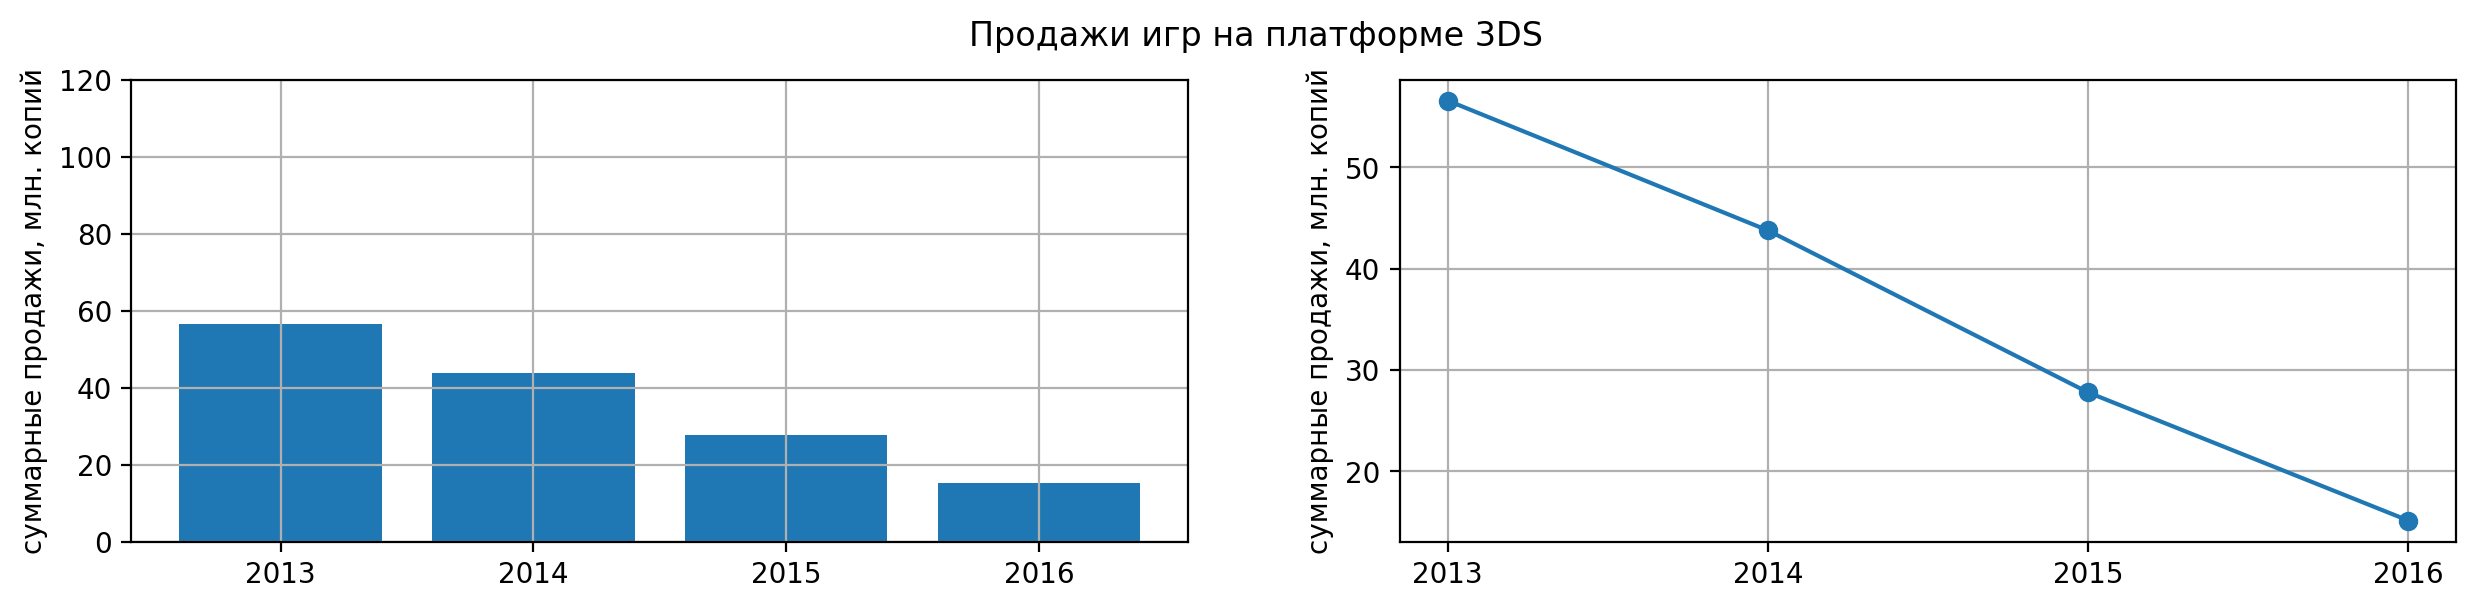

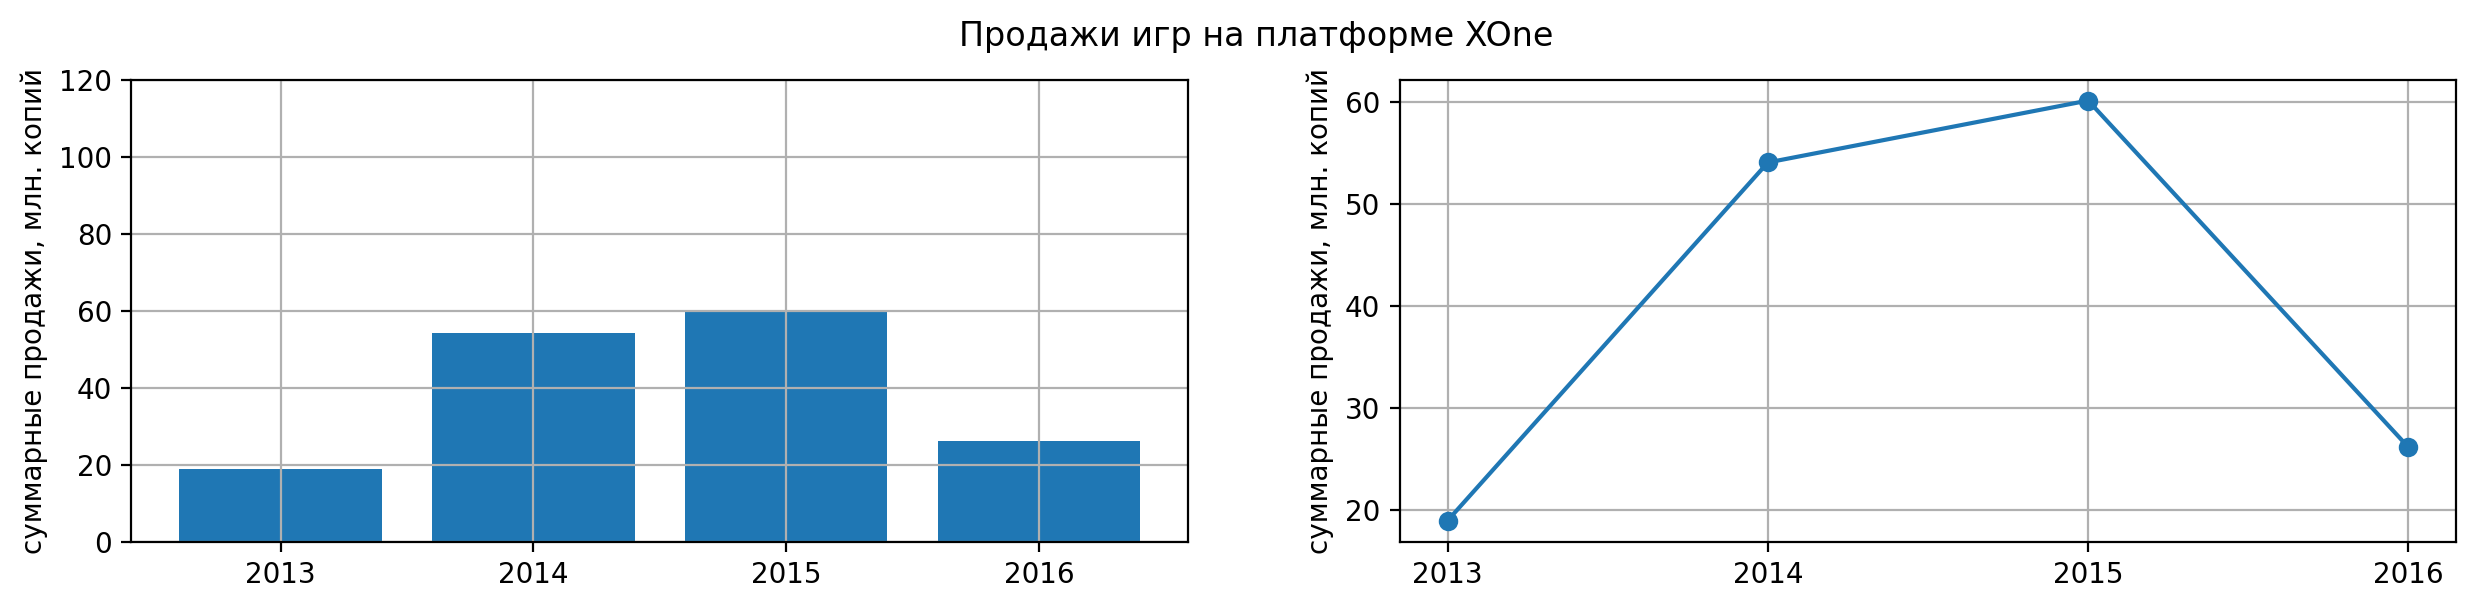

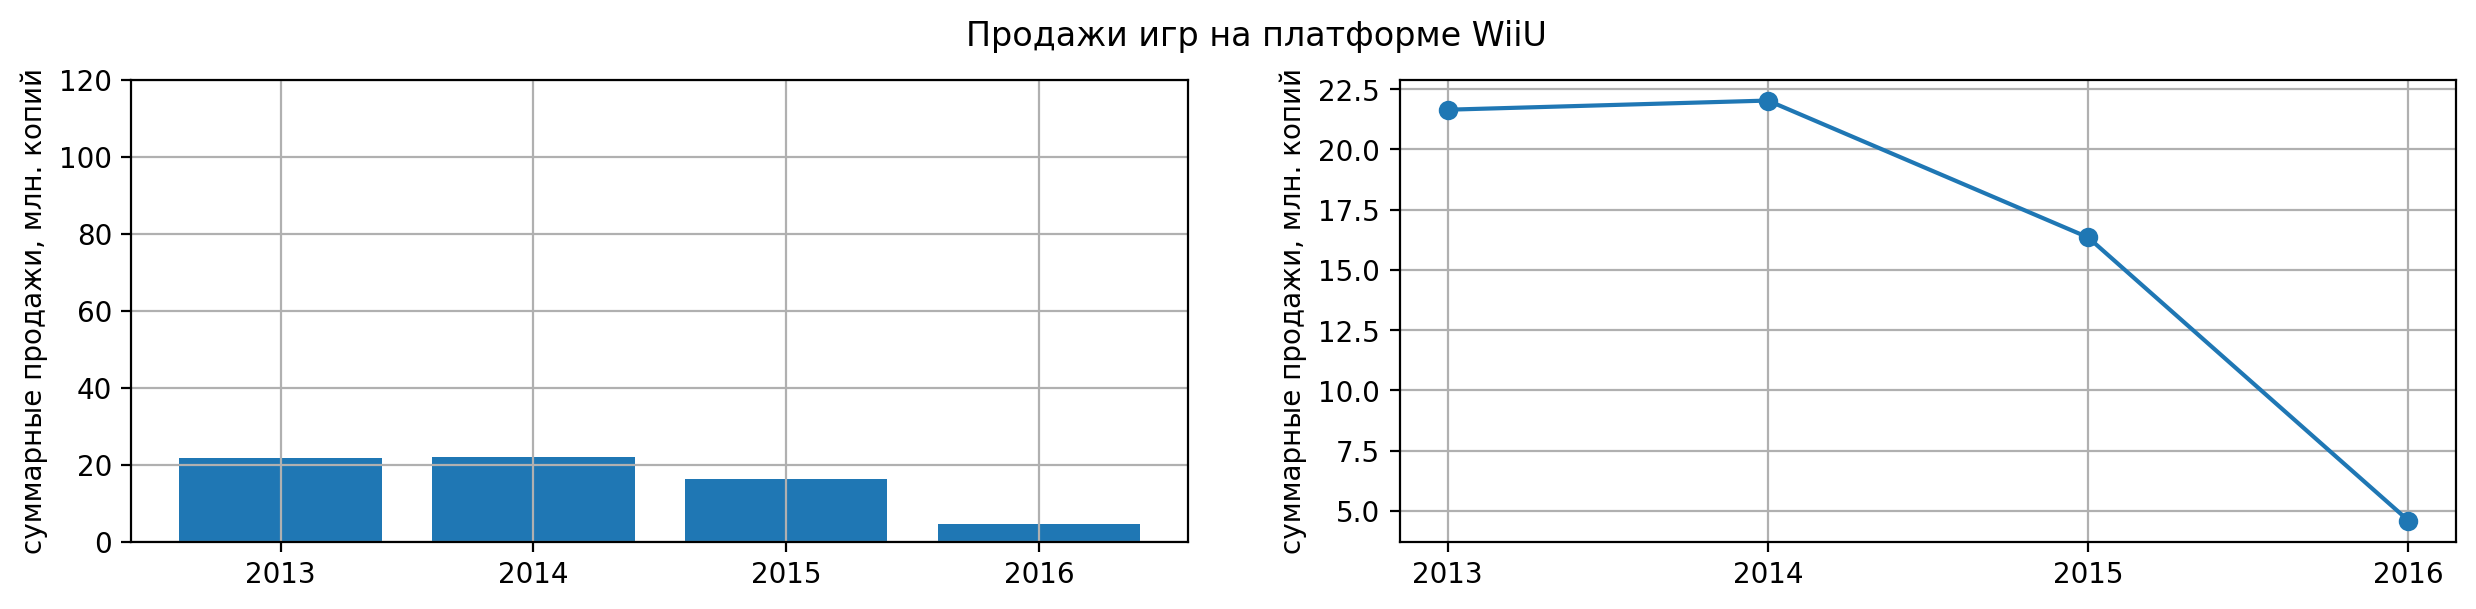

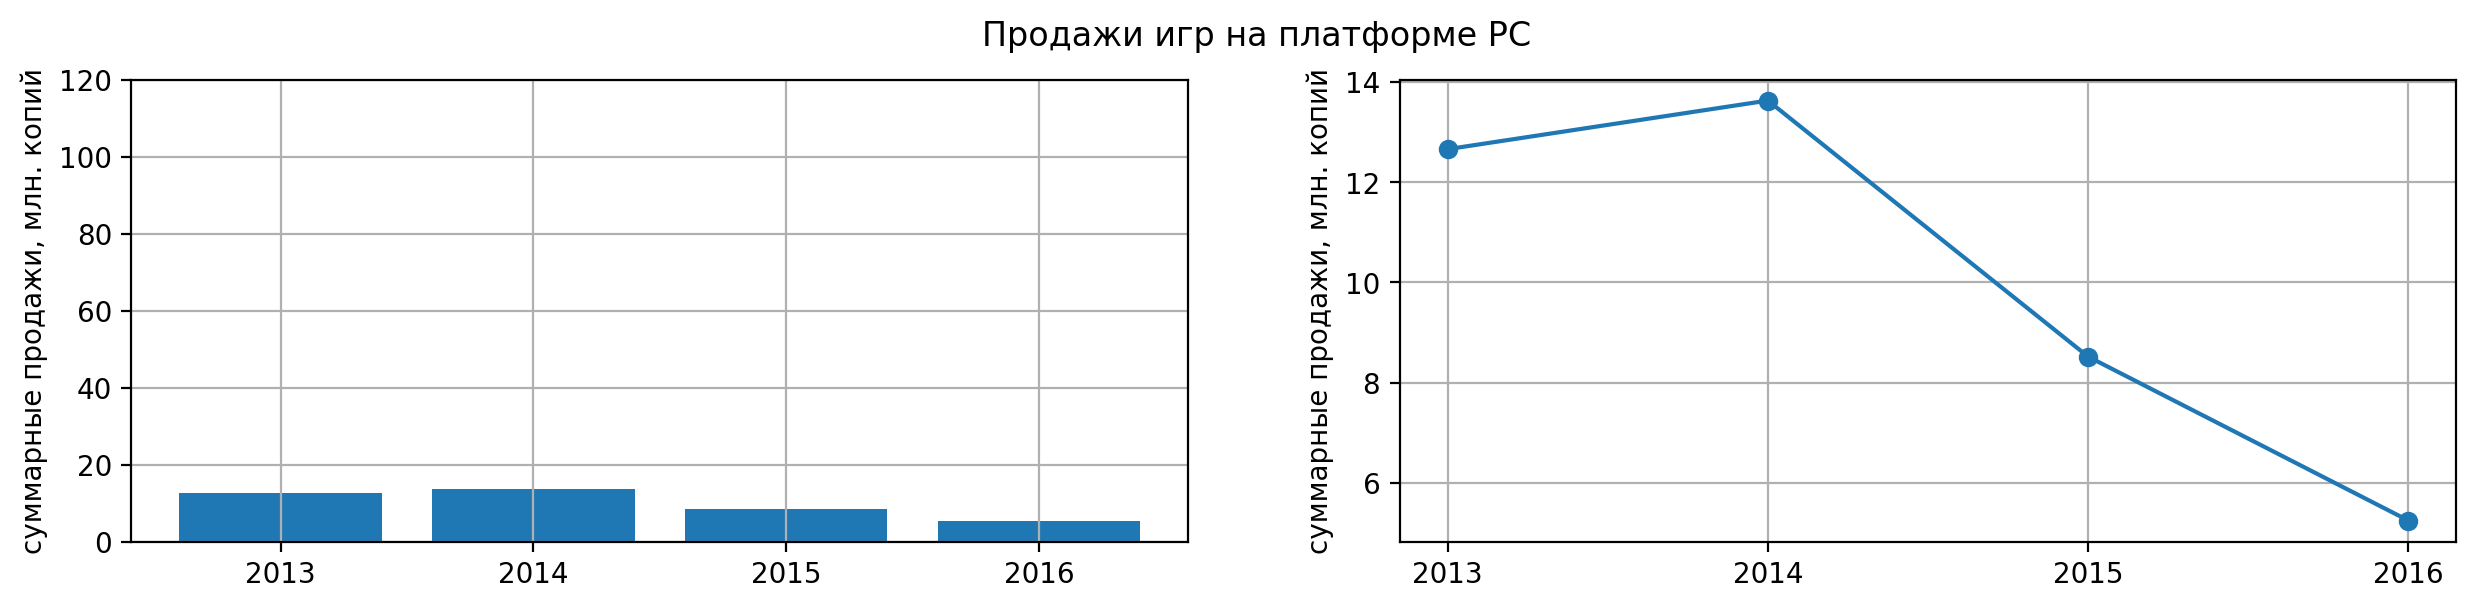

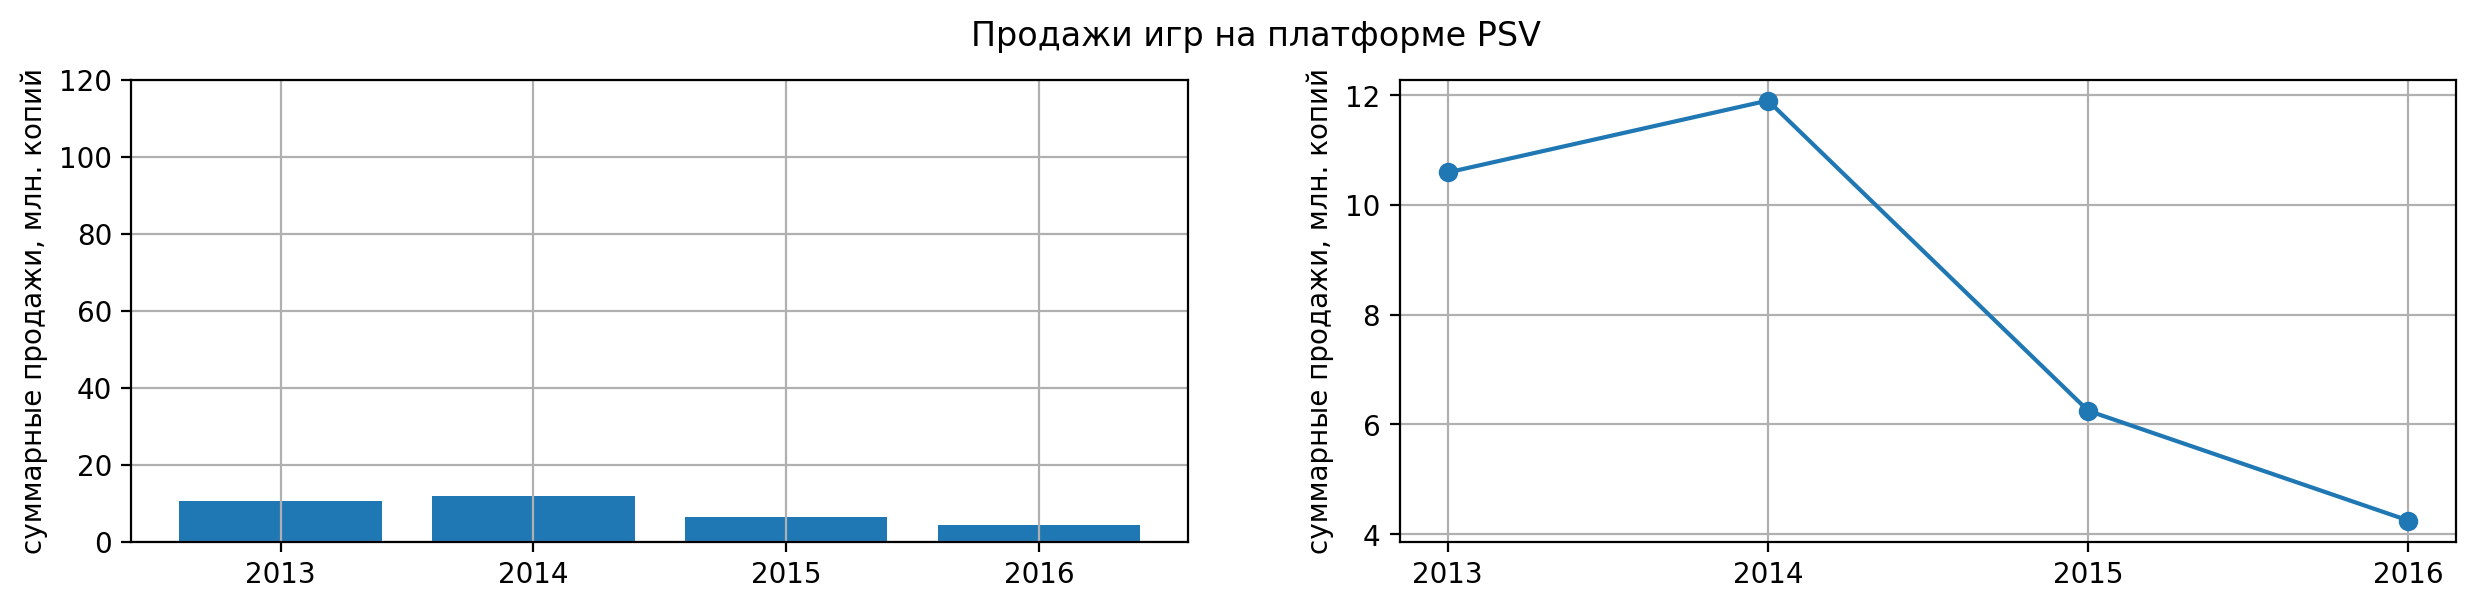

In [51]:
# Посмотрим, как менялись продажи по платформам. Построим распределения по годам для каждой платформы.
for platform in target_data['platform'].unique():
    
    platform_sales = (target_data[target_data['platform'] == platform]
                      .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'))
    
    plt.figure(figsize=(15,3))
    plt.suptitle(f"Продажи игр на платформе {platform}")
    
    plt.subplot(1, 2, 1)
    plt.bar(platform_sales.index, platform_sales['total_sales'])
    plt.xlabel('')
    plt.ylabel('cуммарные продажи, млн. копий')
    plt.ylim(0, 120)
    plt.xticks(np.arange(2013, 2017, 1), rotation = 0)
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(platform_sales['total_sales'], marker='o')
    plt.xlabel('')
    plt.ylabel('cуммарные продажи, млн. копий')
    plt.xticks(np.arange(2013, 2017, 1), rotation = 0)
    plt.grid(True);
    plt.show()

In [52]:
# Посмотрим на количество выпущенных каждой платформой игр, а также на средние продажи по платформам.
target_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.09,0.280,14.60
PC,192.0,0.208646,0.349801,0.01,0.03,0.08,0.230,3.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
PSV,358.0,0.092151,0.153816,0.01,0.02,0.04,0.110,1.96
WiiU,115.0,0.562000,1.038778,0.01,0.06,0.20,0.595,7.09
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


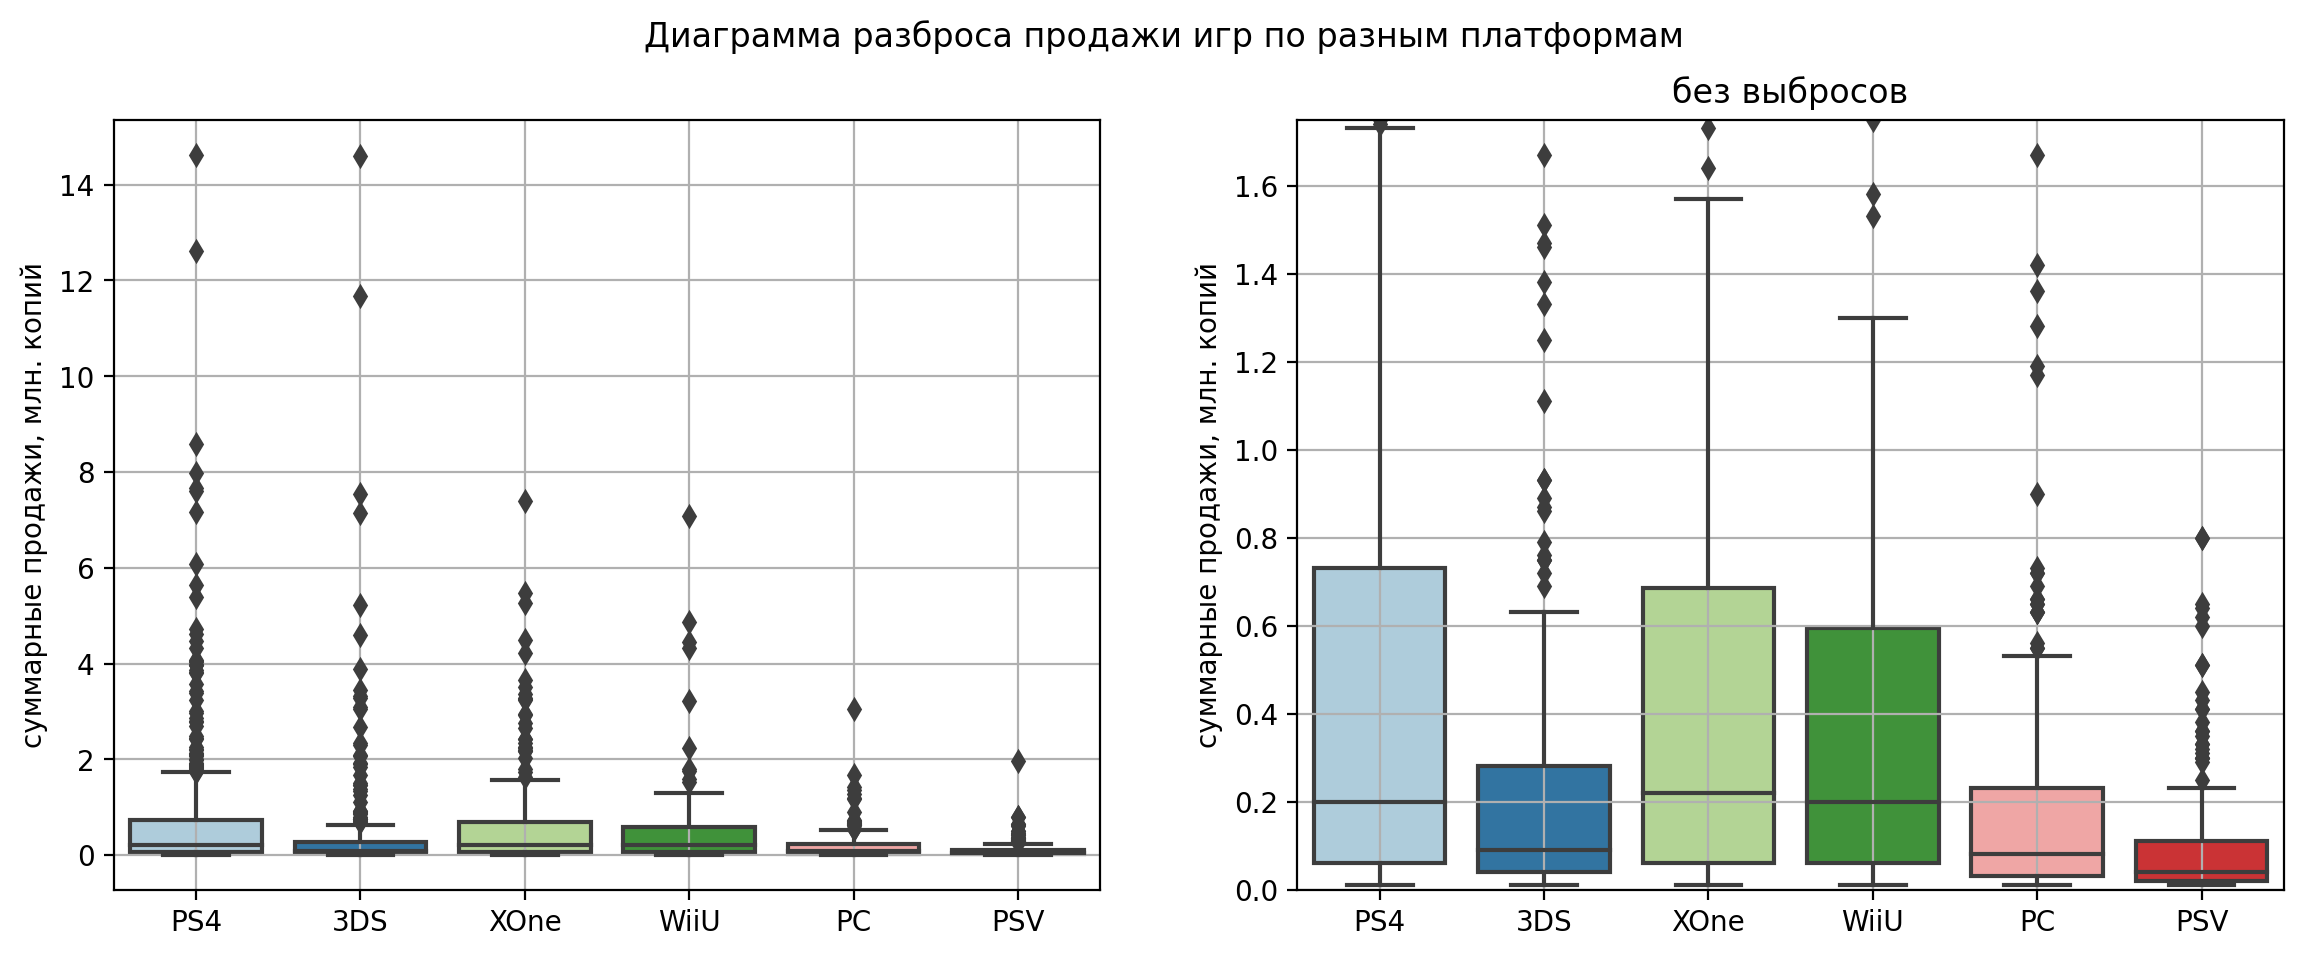

In [53]:
# Построим диаграмы boxplot
plt.figure(figsize=(14,5))
plt.suptitle("Диаграмма разброса продажи игр по разным платформам")
plt.subplot(1, 2, 1)
sns.boxplot(data=target_data, x='platform', y='total_sales', palette="Paired")
plt.xlabel(None)
plt.ylabel('cуммарные продажи, млн. копий')
plt.grid()
plt.subplot(1, 2, 2)
sns.boxplot(data=target_data, x='platform', y='total_sales', palette="Paired")
plt.title("без выбросов")
plt.xlabel(None)
plt.ylabel('cуммарные продажи, млн. копий')
plt.grid()
plt.ylim(0, 1.75)
plt.show();

In [54]:
# Код ревьюера
print(target_data['platform'].unique()) # твой датасет

data.query('year_of_release >= 2013')['platform'].unique() # Все платформы с продажами в актуальный период

['PS4' '3DS' 'XOne' 'WiiU' 'PC' 'PSV']


C:\Users\marid\AppData\Local\Temp\ipykernel_9256\1895589044.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data.query('year_of_release >= 2013')['platform'].unique() # Все платформы с продажами в актуальный период


array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

**Вывод**

В течении 4 лет с 2013 года наиболее популярными платформами были:
- Sony PlayStation 4 (PS4) выпущена в 2013 году
- Nintendo 3DS (3DS) выпущена в 2011 году
- Xbox One (XOne) выпущена в 2013 году
- Nintendo Wii U (WiiU) выпущена в 2012 году
- Персональный компьютер (PC)
- Sony PlayStation Vita (PSV) выпущена в 2012 году

На полной диаграмме разброса (слева) четко видно, что все платформы обладают выбросами в сторону больших значений. Это означает, что у платформы были сверхуспешные проекты, которые продавались намного лучше большинства игр на этой платформе. Наибольшее количество таких сверхбольших продаж у Sony PlayStation 4 и Nintendo 3DS. В их случае это связано с тем, что платформы предоставляют эксклюзивные высокочаственные проекты, которые не выходят больше ни на одной из других платформ.

Рассматривая подробнее диаграмму разброса (справа) можно прийти к следующим выводам:

Приставки Sony PlayStation 4 и Xbox One наиболее крупные конкуренты на рынке компьютерных игр. Среди портативных игровых консолей наиболее продаваемая Nintendo Wii U и потом Nintendo 3DS. Игры на ПК продаются хуже, чем игры для консолей, скорее всего это связано с тем, что далеко не все домашние компьютеры, могут тянуть мощность действительно хороших игр.

Наиболее перспективные платформы - это игровые приставки **Xbox One** и **Sony PlayStation 4**. Они имеют наибольший медианный уровень продаж, и при этом не теряют свою актуальность.

Портативные приставки такие, как Nintendo Wii U, Nintendo 3DS и Sony PlayStation Vita, теряют свою актуальность, так как в случае "портативности" на первый план выходит мобильный гейминг. Эти платформы не рекомендуются для продвижения, так в динамике наблюдается сильный спад продаж для этих платформ.

Но при этом в 2016 году из анонса компании Nintendo известно о скором выходе новой портативной платформы Nintendo Switch, которая является преемником Nintendo 3DS и Wii U, и при этом это совершенно новый вид платформы - гибридная игровая консоль.  Nintendo Switch совмещает в себе свойства домашней игровой приставки и портативной игровой системы и может использоваться в обоих качествах. Выход плаформы состоится в 2017 году. Поэтому игры для **Nintendo Switch** потенциально будут одними из наиболее популярных в 2017 году.

#### Определим как влияют на продажи отзывы пользователей и критиков.

Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

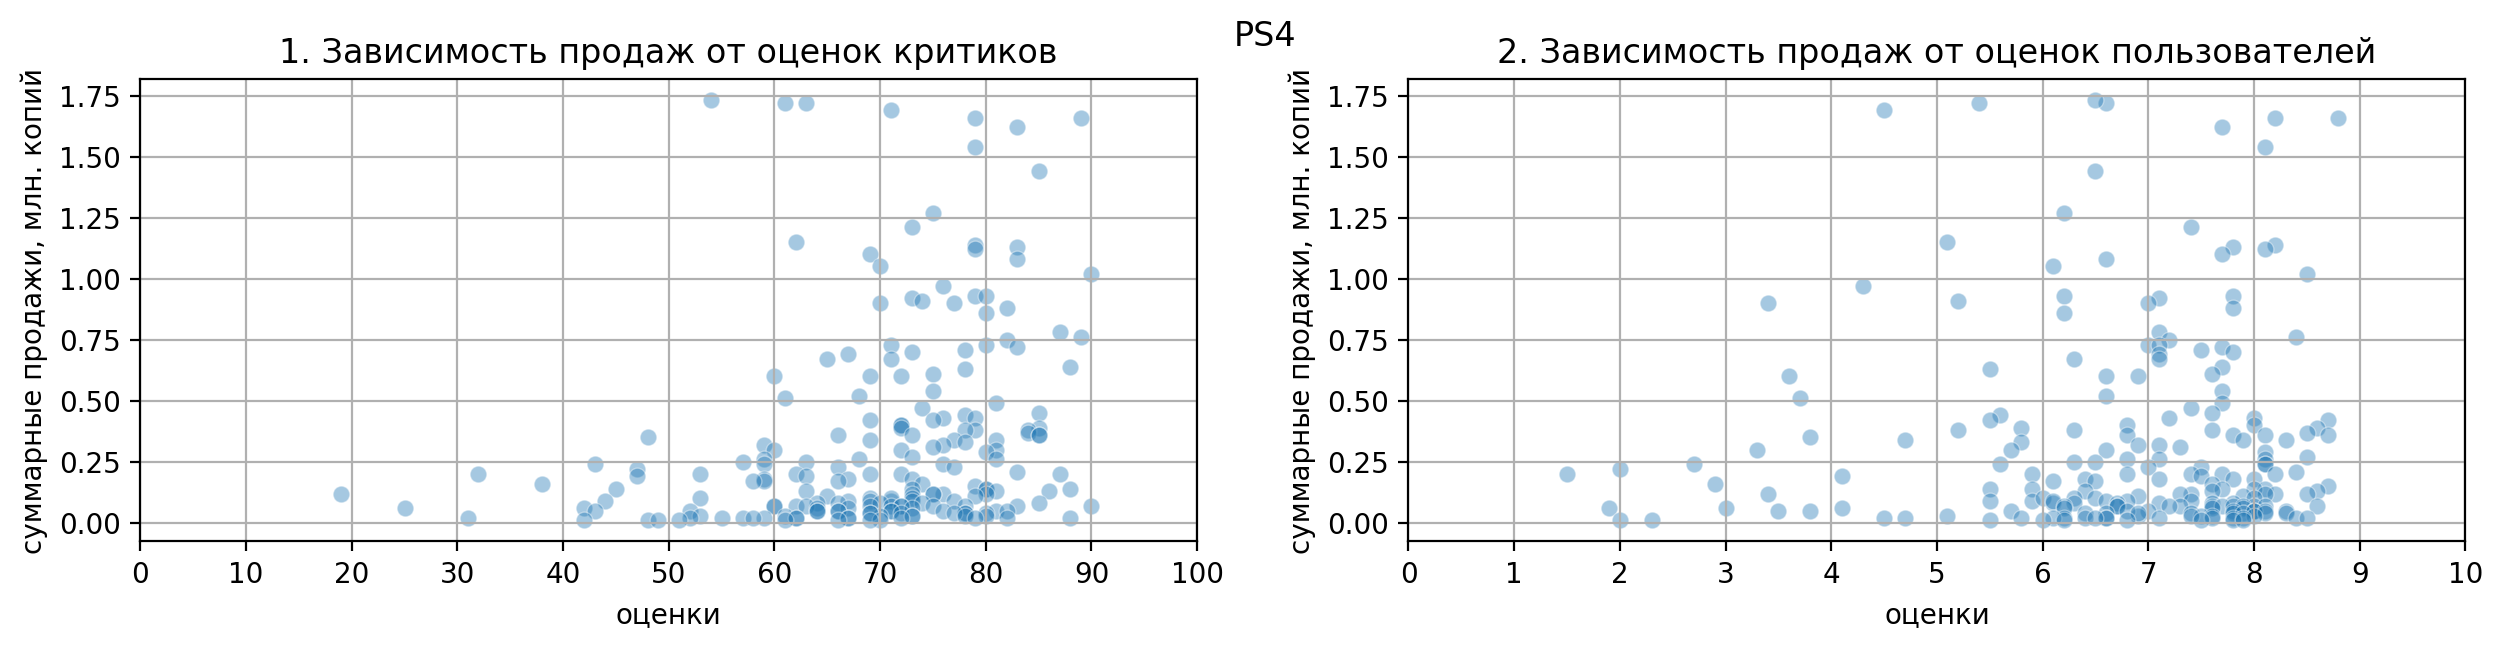

1. Коэффициент корреляции Пирсона: 0.2645723362375023
2. Коэффициент корреляции Пирсона: 0.03208779736823888


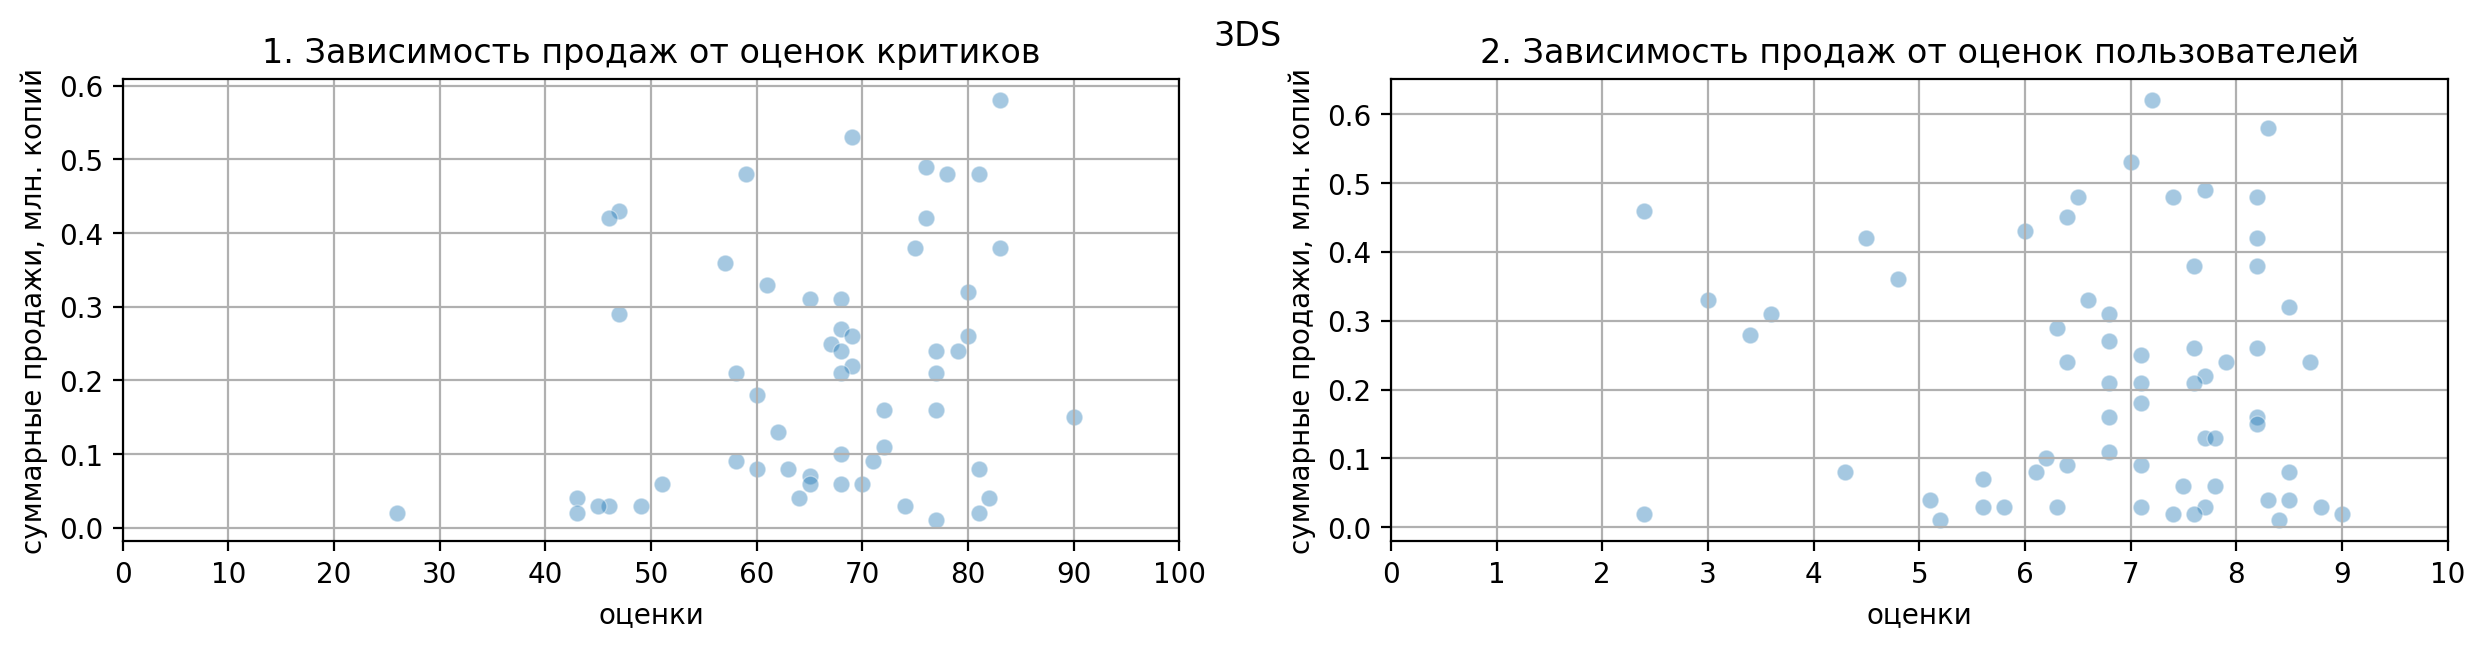

1. Коэффициент корреляции Пирсона: 0.25914443255978287
2. Коэффициент корреляции Пирсона: -0.05997844176895947


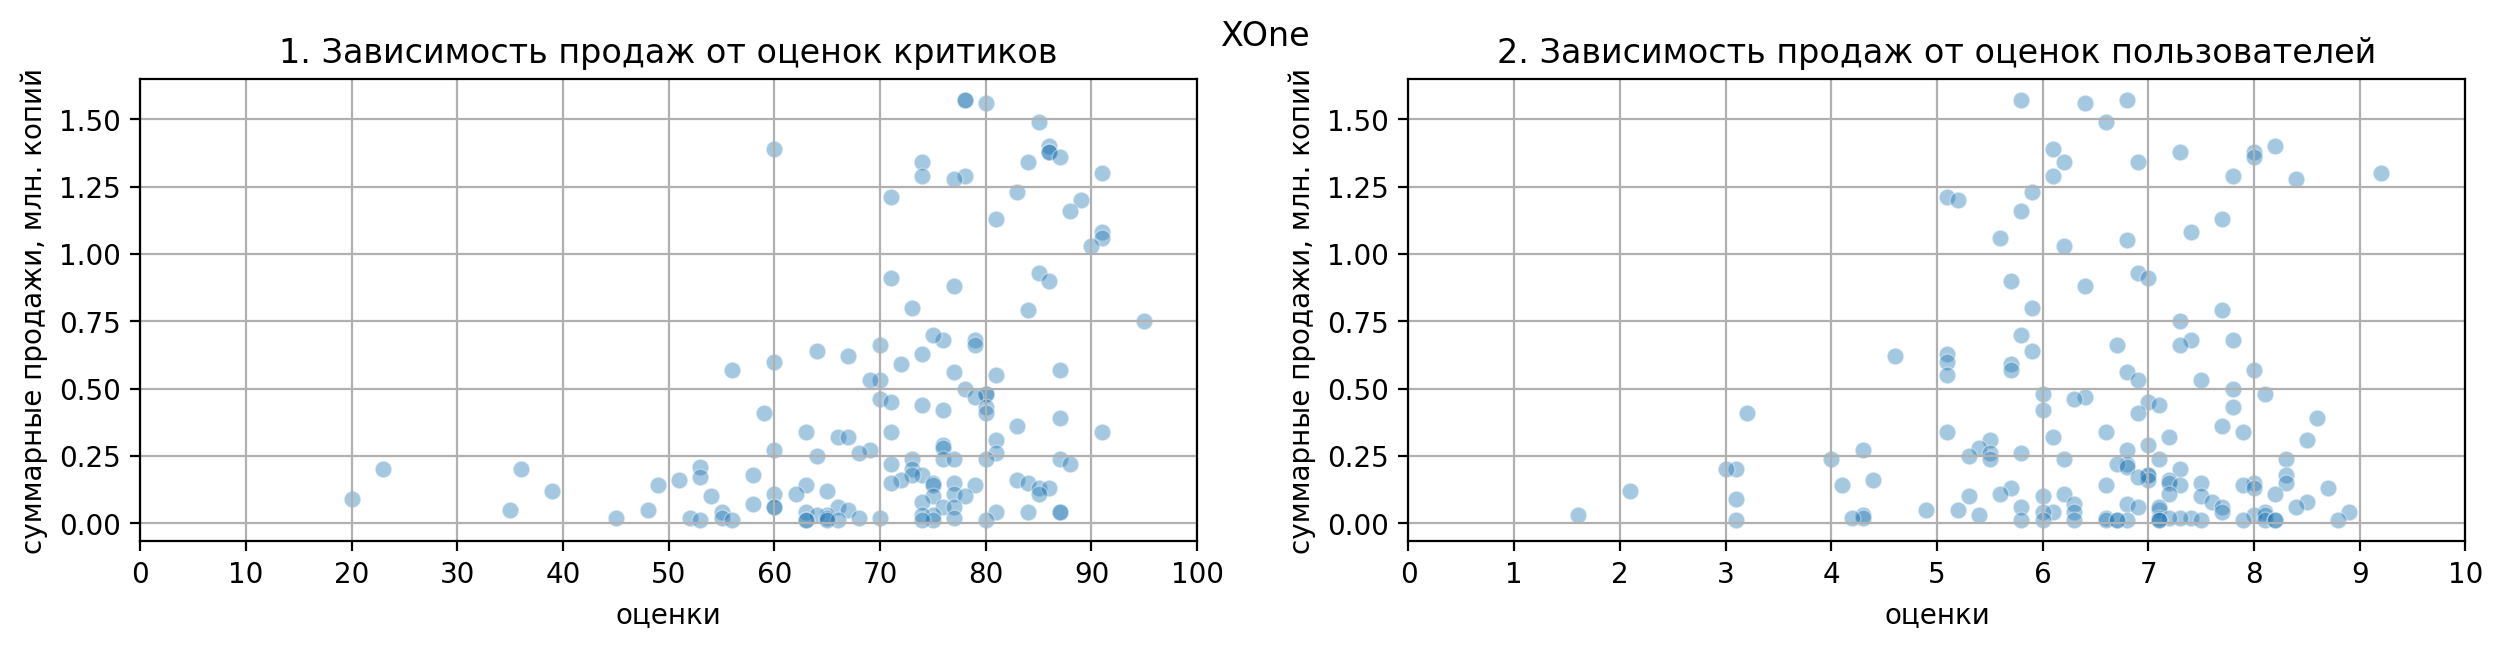

1. Коэффициент корреляции Пирсона: 0.4201338687981549
2. Коэффициент корреляции Пирсона: 0.05990079044888021


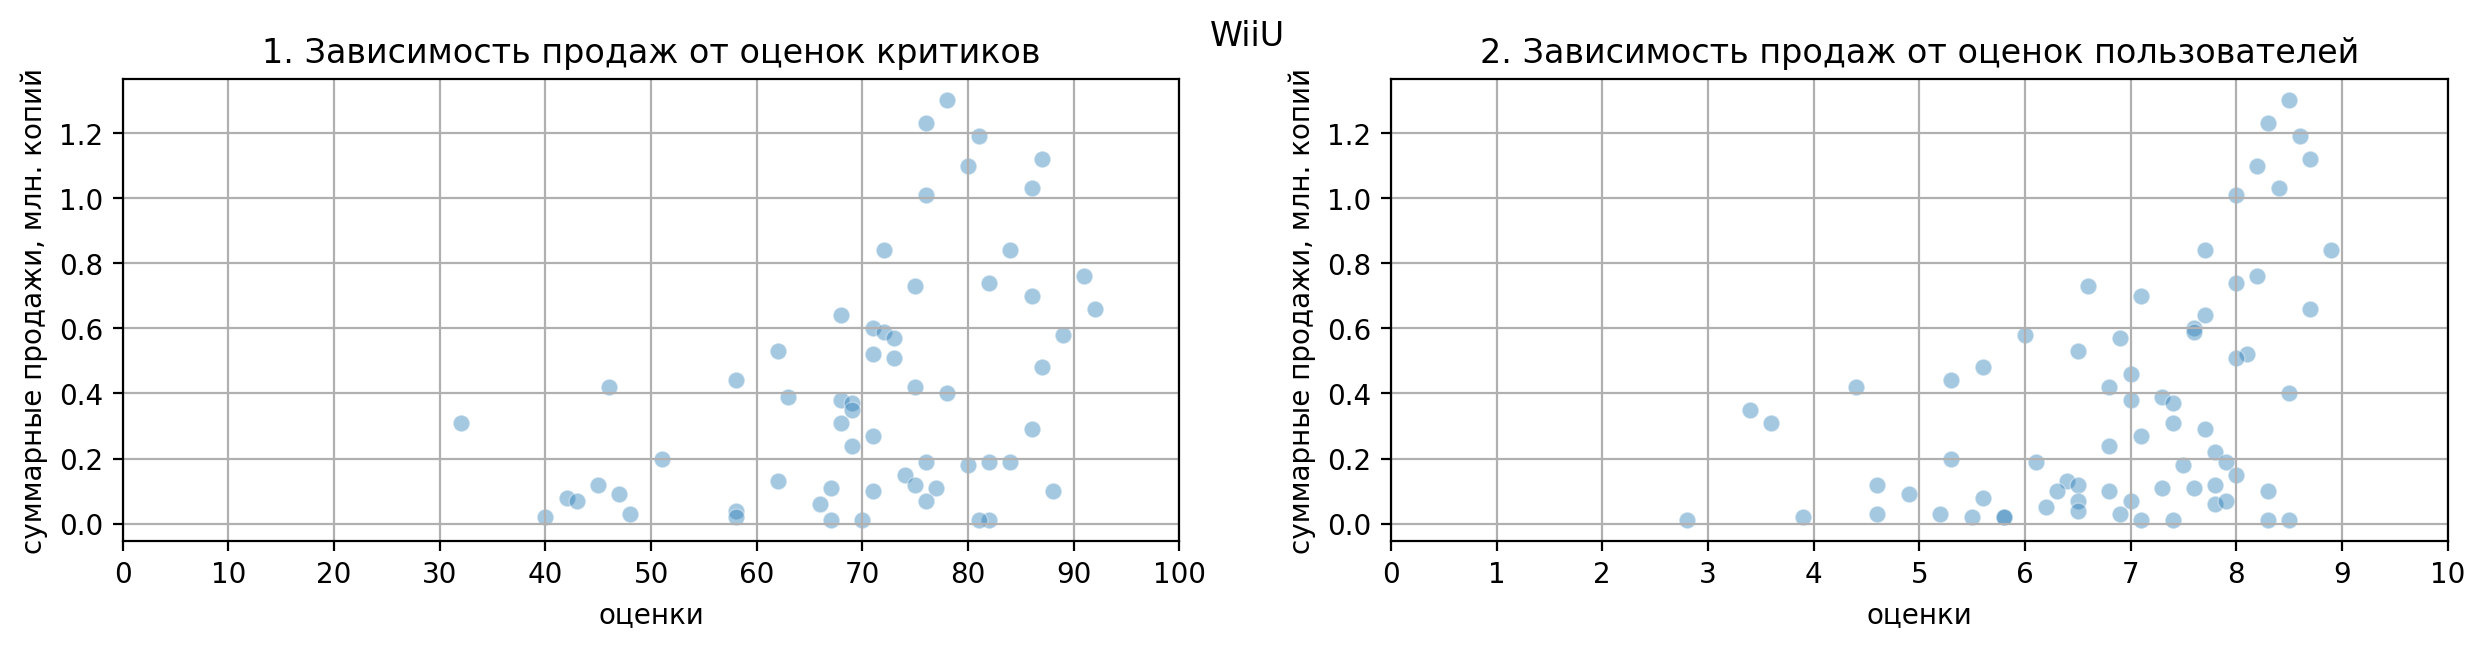

1. Коэффициент корреляции Пирсона: 0.4339269991784759
2. Коэффициент корреляции Пирсона: 0.45490247481234375


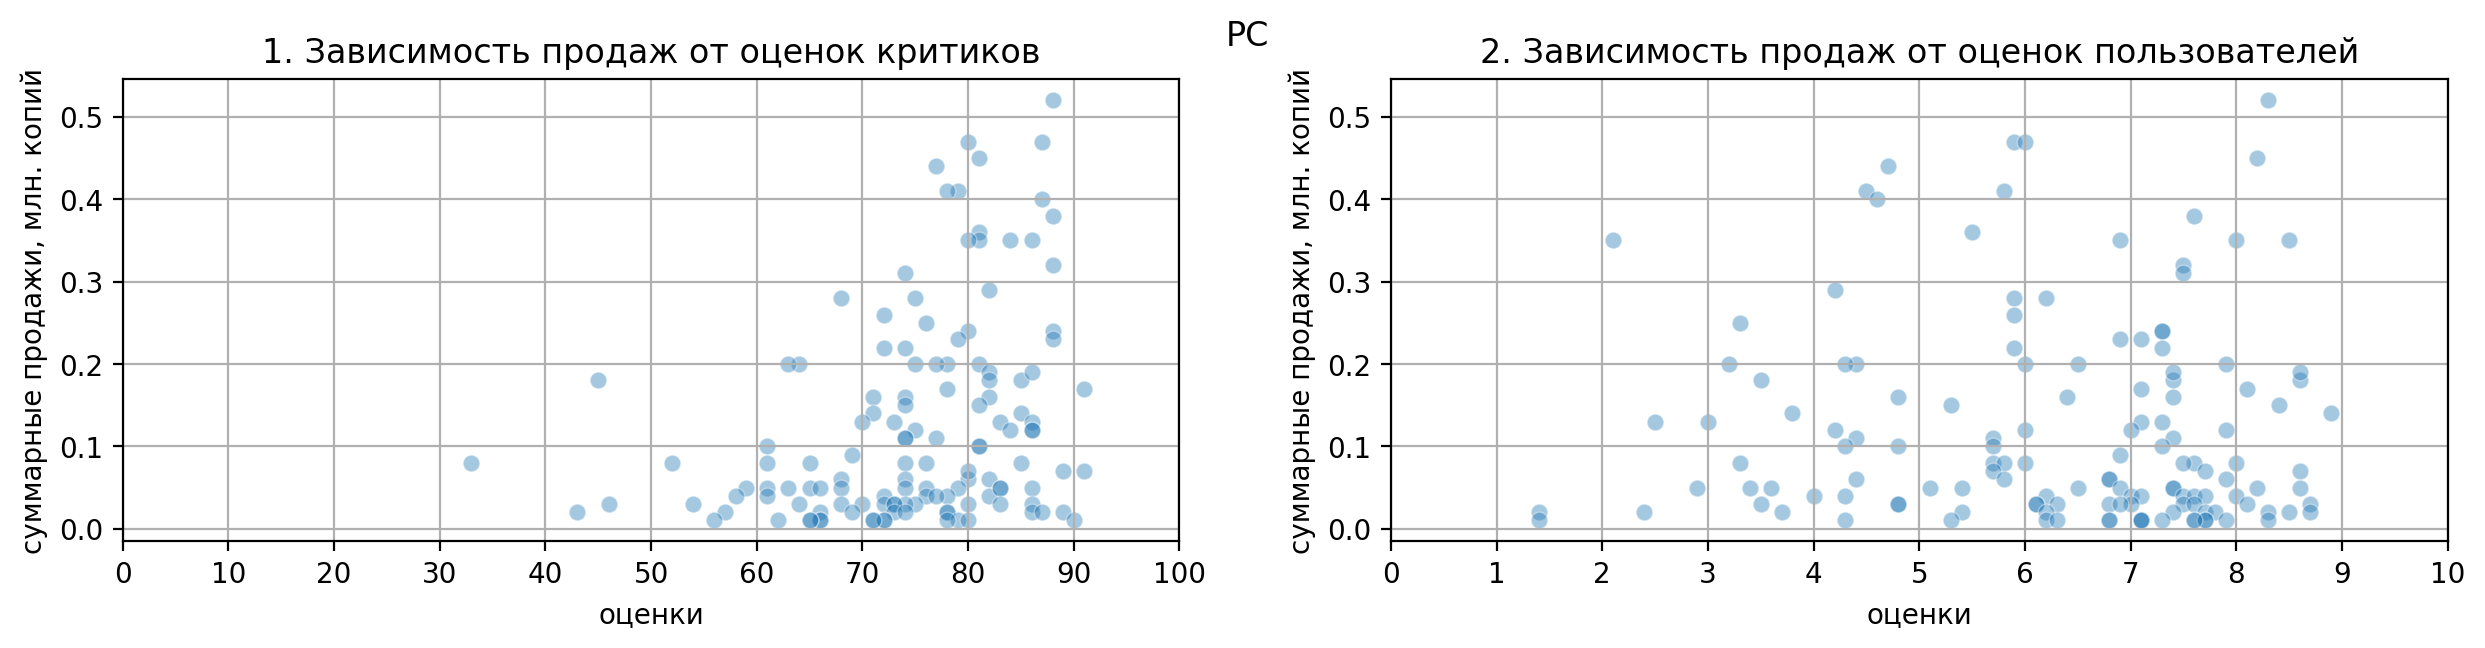

1. Коэффициент корреляции Пирсона: 0.33579387308773967
2. Коэффициент корреляции Пирсона: -0.03229300782993009


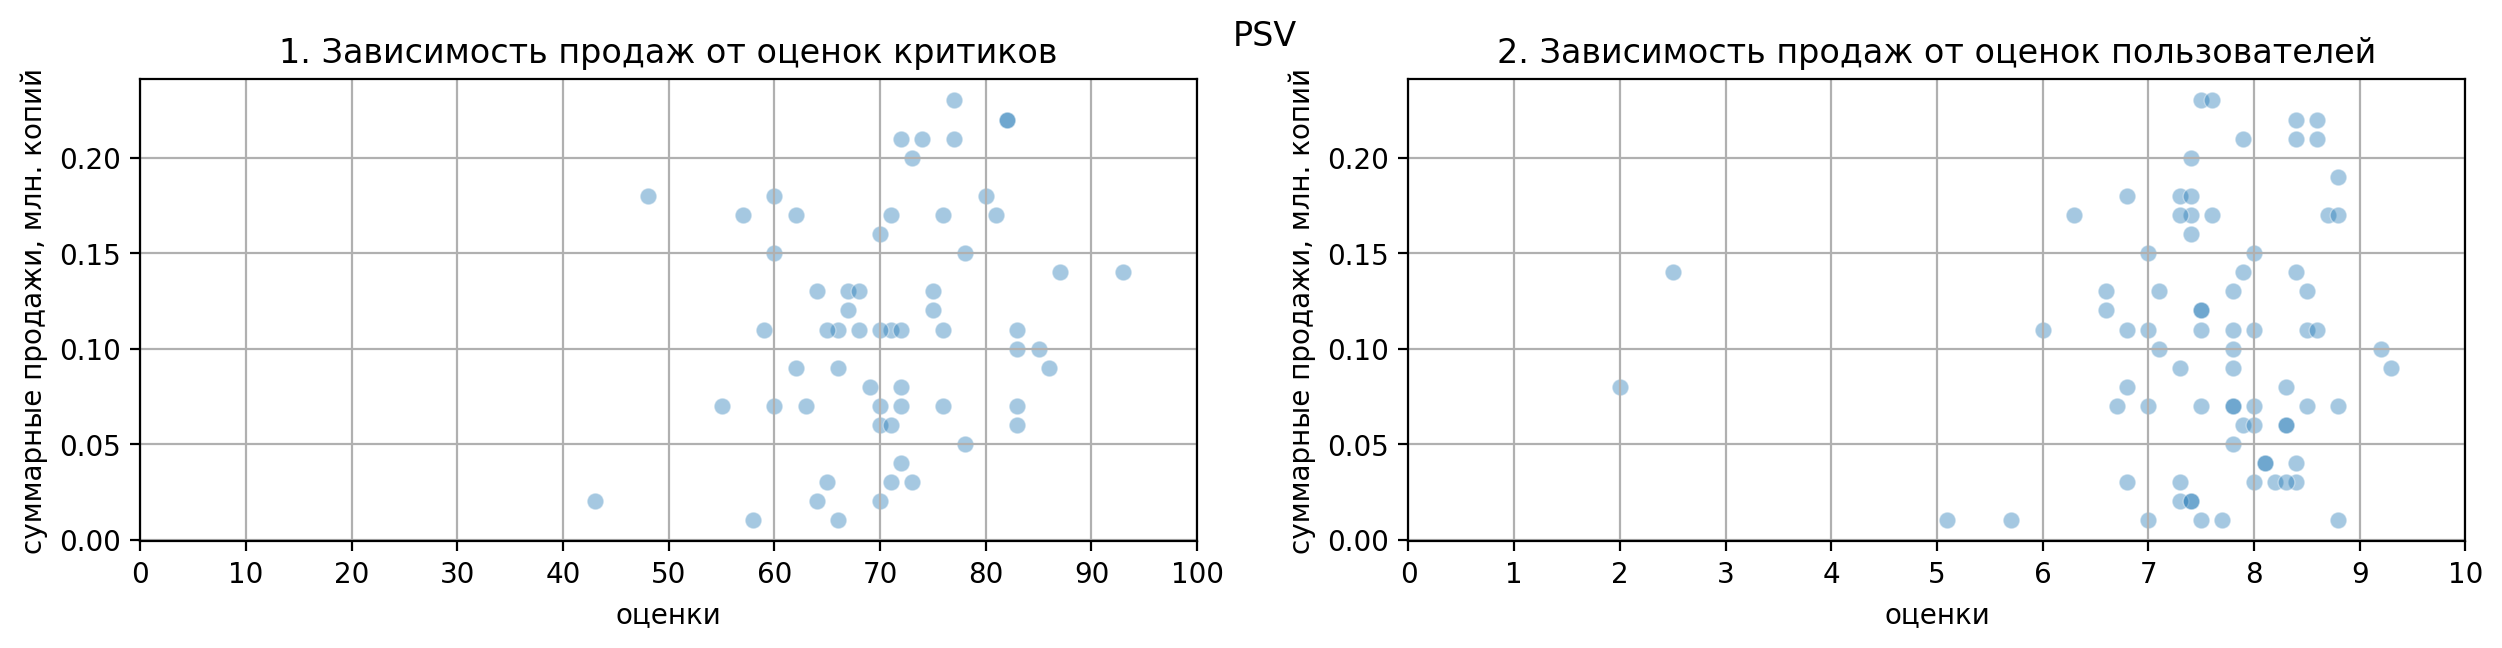

1. Коэффициент корреляции Пирсона: 0.22470261926896629
2. Коэффициент корреляции Пирсона: 0.06994331938188056


In [55]:
# определим дополнительную функцию
def IQR_limits(data, columns):
    ''' Определяет нижнюю и верхнюю границу выбросов, используя интерквартильных размах (IQR).'''
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# Исследование влияния на продажи отзывов пользователей и критиков
for current_platform in target_data['platform'].unique():
    # Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
    data_PS4 = target_data.query('platform == @current_platform')

    # Так как коэффициент корреляции Пирсона чувствителен к выбросам, уберем их из данных
    lower, upper = IQR_limits(data_PS4, 'total_sales')
    data_PS4 = data_PS4.query('0 < total_sales < @upper')
    # отрисуем диаграммы рассеивания
    plt.figure(figsize=(15,3))
    plt.suptitle(f"{current_platform }")
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=data_PS4, x='critic_score', y='total_sales', alpha=0.4)
    plt.title('1. Зависимость продаж от оценок критиков')
    plt.xlabel('оценки')
    plt.ylabel('cуммарные продажи, млн. копий')
    plt.xticks(np.arange(0, 110, 10))
    plt.grid()
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=data_PS4, x='user_score', y='total_sales', alpha=0.4)
    plt.title('2. Зависимость продаж от оценок пользователей')
    plt.xlabel('оценки')
    plt.ylabel('cуммарные продажи, млн. копий')
    plt.xticks(np.arange(0, 11, 1))
    plt.grid()
    plt.show();
    # посчитаем корреляцию
    print('1. Коэффициент корреляции Пирсона:', data_PS4['total_sales'].corr(data_PS4['critic_score'].astype(float)))
    print('2. Коэффициент корреляции Пирсона:', data_PS4['total_sales'].corr(data_PS4['user_score'].astype(float)))

**Вывод**

Оценка пользователей не имеет существенного значения для продаж, в то время как мнение критиков имеет значение. Этот результат выглядит интересно. Это означает, что разработчикам игр не нужно беспокоиться о восприятии игры игроками, что удивительно, потому что игроки - это люди, которые платят за игру. Объяснение этому заключается в том, что люди предпочитают прислушиваться к экспертам. Они полагают, что если у человека есть особая квалификация, то его мнение важно. Вот такая психология)

Четкой корреляции коэффициент Пирсона не показывает, можно предположить что либо связь очень слаба или ее вообще нет, либо имеет нелинейный характер. Рекомендуется провести дополнительное исследование с помощью регрессионого анализа.

#### Определим самые прибыльные жанры игр.

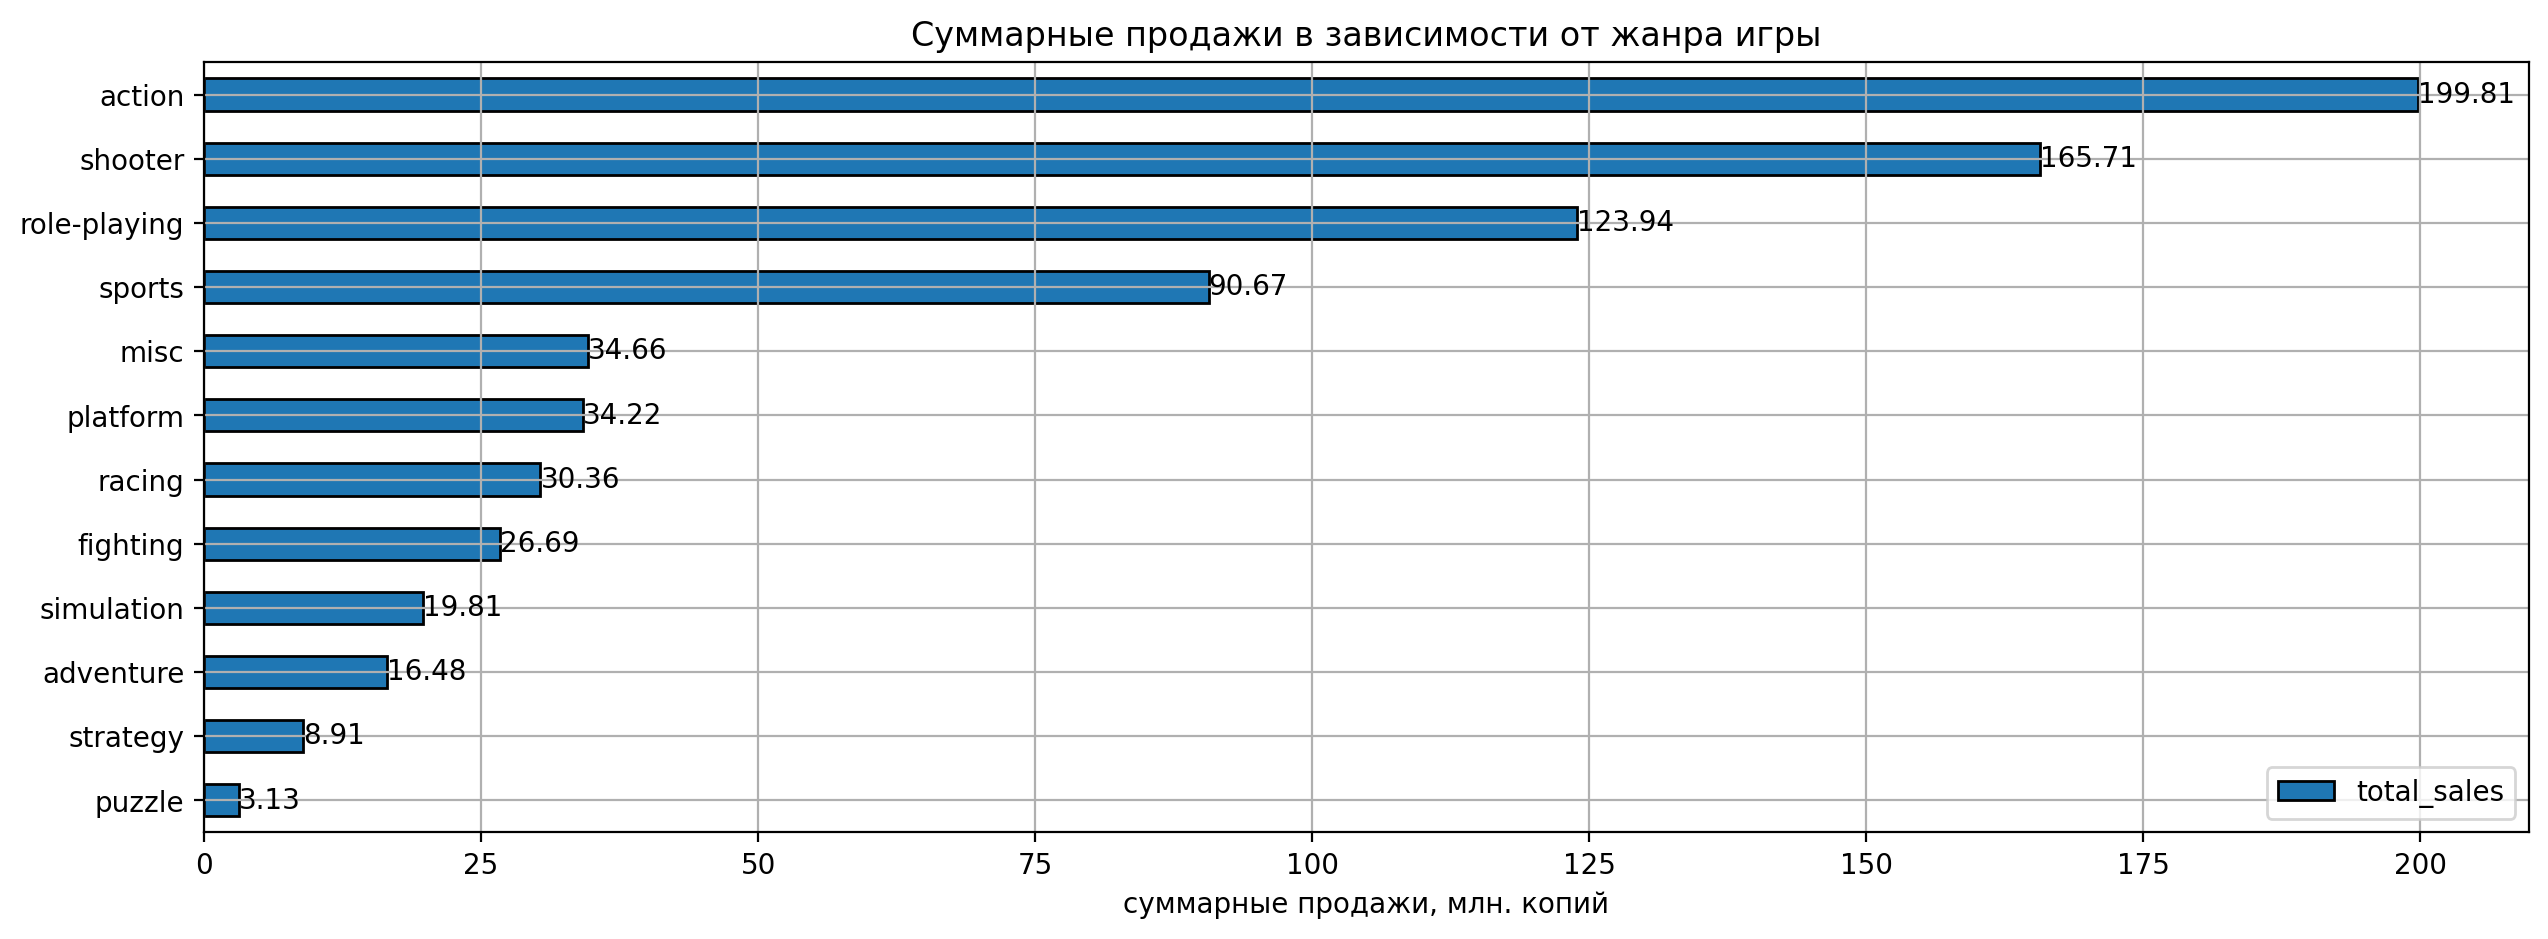

In [56]:
# Рассмотрим суммарные продажи игр разных жанров
ax = (target_data
      .pivot_table(index='genre', values='total_sales', aggfunc='sum')
      .sort_values('total_sales')
      .plot(kind='barh', y='total_sales', grid=True, ec='black', figsize=(15, 5)))   
plt.title('Cуммарные продажи в зависимости от жанра игры')
plt.ylabel(None)
plt.xlabel('cуммарные продажи, млн. копий')
plt.bar_label(ax.containers[0])
plt.show();

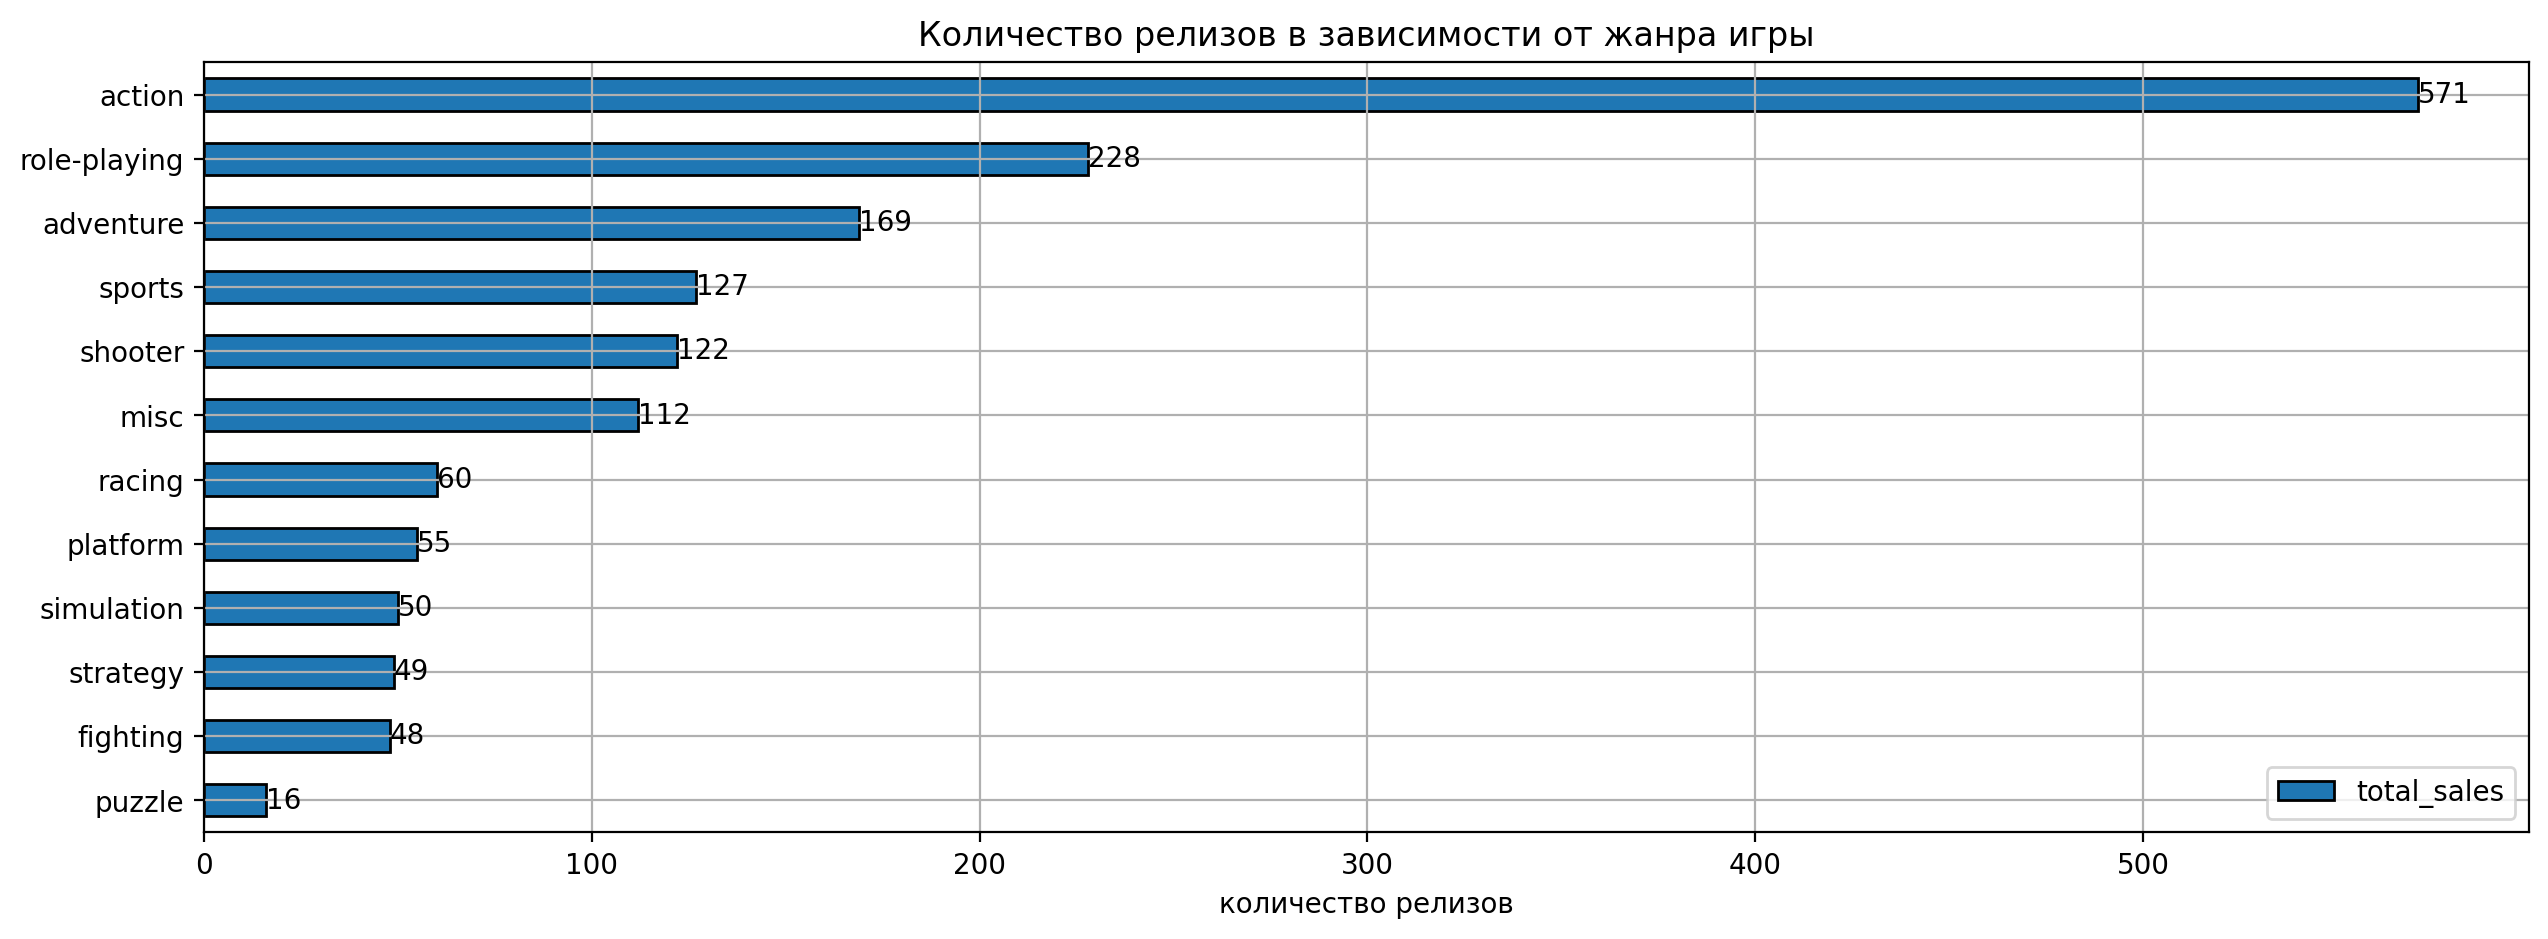

In [57]:
# Рассмотрим количество игр в разных жанрах
ax = (target_data.pivot_table(index='genre', values='total_sales', aggfunc='count')
      .sort_values('total_sales')
      .plot(kind='barh', y='total_sales', grid=True, ec='black', figsize=(15, 5)))   
plt.title('Количество релизов в зависимости от жанра игры')
plt.ylabel(None)
plt.xlabel('количество релизов')
plt.bar_label(ax.containers[0])
plt.show();

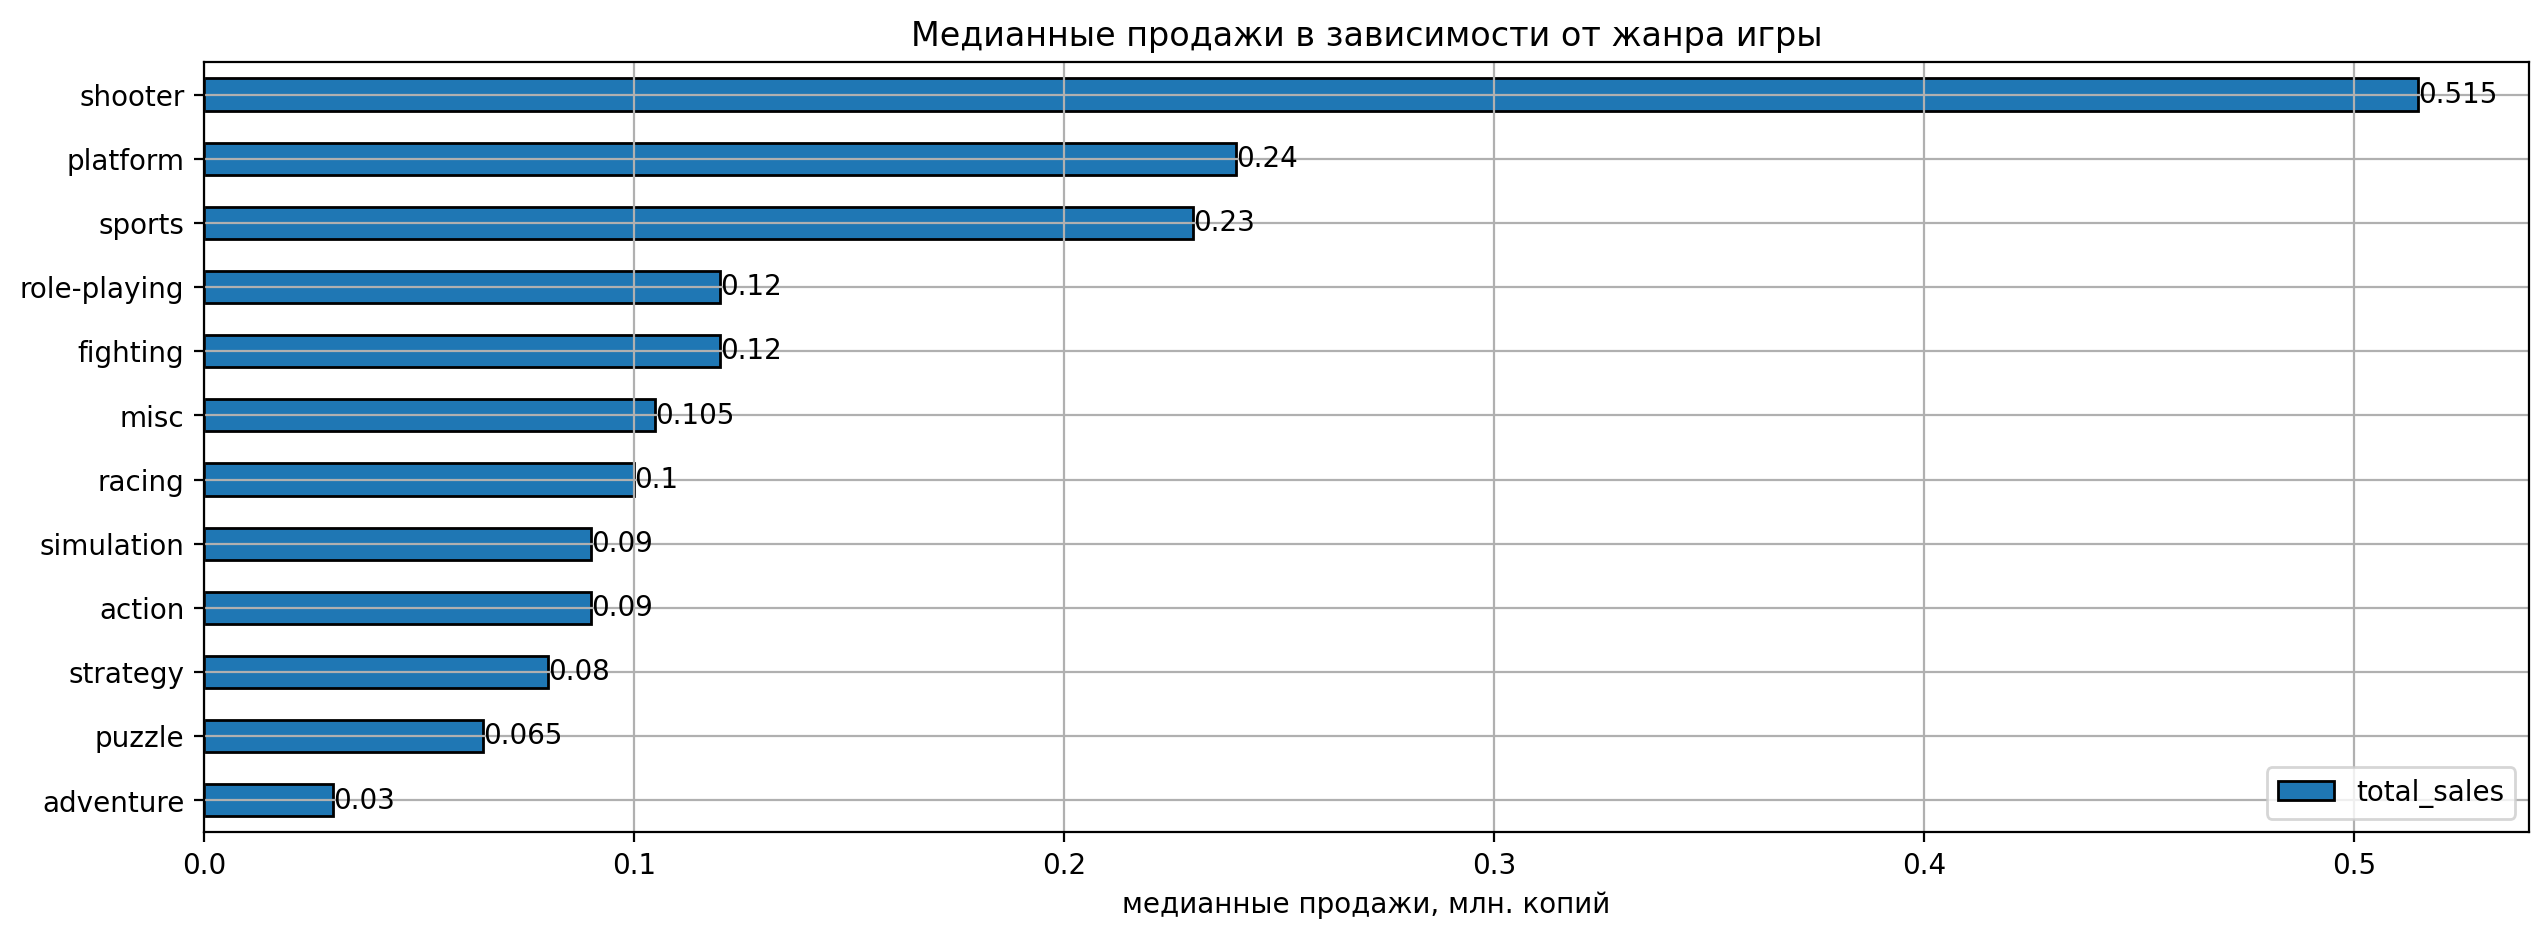

In [58]:
# Рассмотрим мединанные продажи игр разных жанров
ax = (target_data
      .pivot_table(index='genre', values='total_sales', aggfunc='median')
      .sort_values('total_sales')
      .plot(kind='barh', y='total_sales', grid=True, ec='black', figsize=(15, 5)))   
plt.title('Медианные продажи в зависимости от жанра игры')
plt.ylabel(None)
plt.xlabel('медианные продажи, млн. копий')
plt.bar_label(ax.containers[0])
plt.show();

**Вывод**

**Наиболее прибыльные жанры**:
- Шутеры (shooter) 
- Платформы (platform)
- Спорт (sports)

**Шутеры** ставят игроков на место шутеров от первого лица и заставляют их уничтожать врагов с помощью огнестрельного или другого оружия. Игры данного жанра являются наиболее популярными, в основном за свою простоту, возможность быстрого и энергичного геймплея. В таких играх выигрывает тот, кто обладает хорошей реакцией и вниманием (скиллом). При этом новых релизов в жанре шутера в сравнении выходит не так много, этот жанр показывает лучшую окупаемость.

**Платформы** - некогда самый распространенный жанр. Суть платформера — в прыжках: главный герой должен прыгать по разным платформам, чтобы преодолевать препятствия, — вот настолько все просто. 

**Спортивные игры** направлены на то, чтобы привнести в виртуальный мир азарт популярных спортивных мероприятий. Игроки могут соревноваться с противниками, управляемыми компьютером, или другими игроками в соревновательных матчах.

**Наименее прибыльные жанры**:
- Приключения (adventure) 

Приключения - размеренная альтернатива напряженным шутерам, стратегиям, гонкам. Образцовые представители жанра увлекают сценарием и предлагают красивые головоломки.

---

Исходя из результатов наиболее и наименее популярных жанров игр можно сделать закономерный вывод, что большинство игроков предпочитают диманичные, быстрые и захватывающие жанры. Игры, которые этого не предлагают, пользуются меньшим спросом.

## 5. Портрет пользователя.
<a id="5"></a>
Рассматриваются данные за актуальный период.

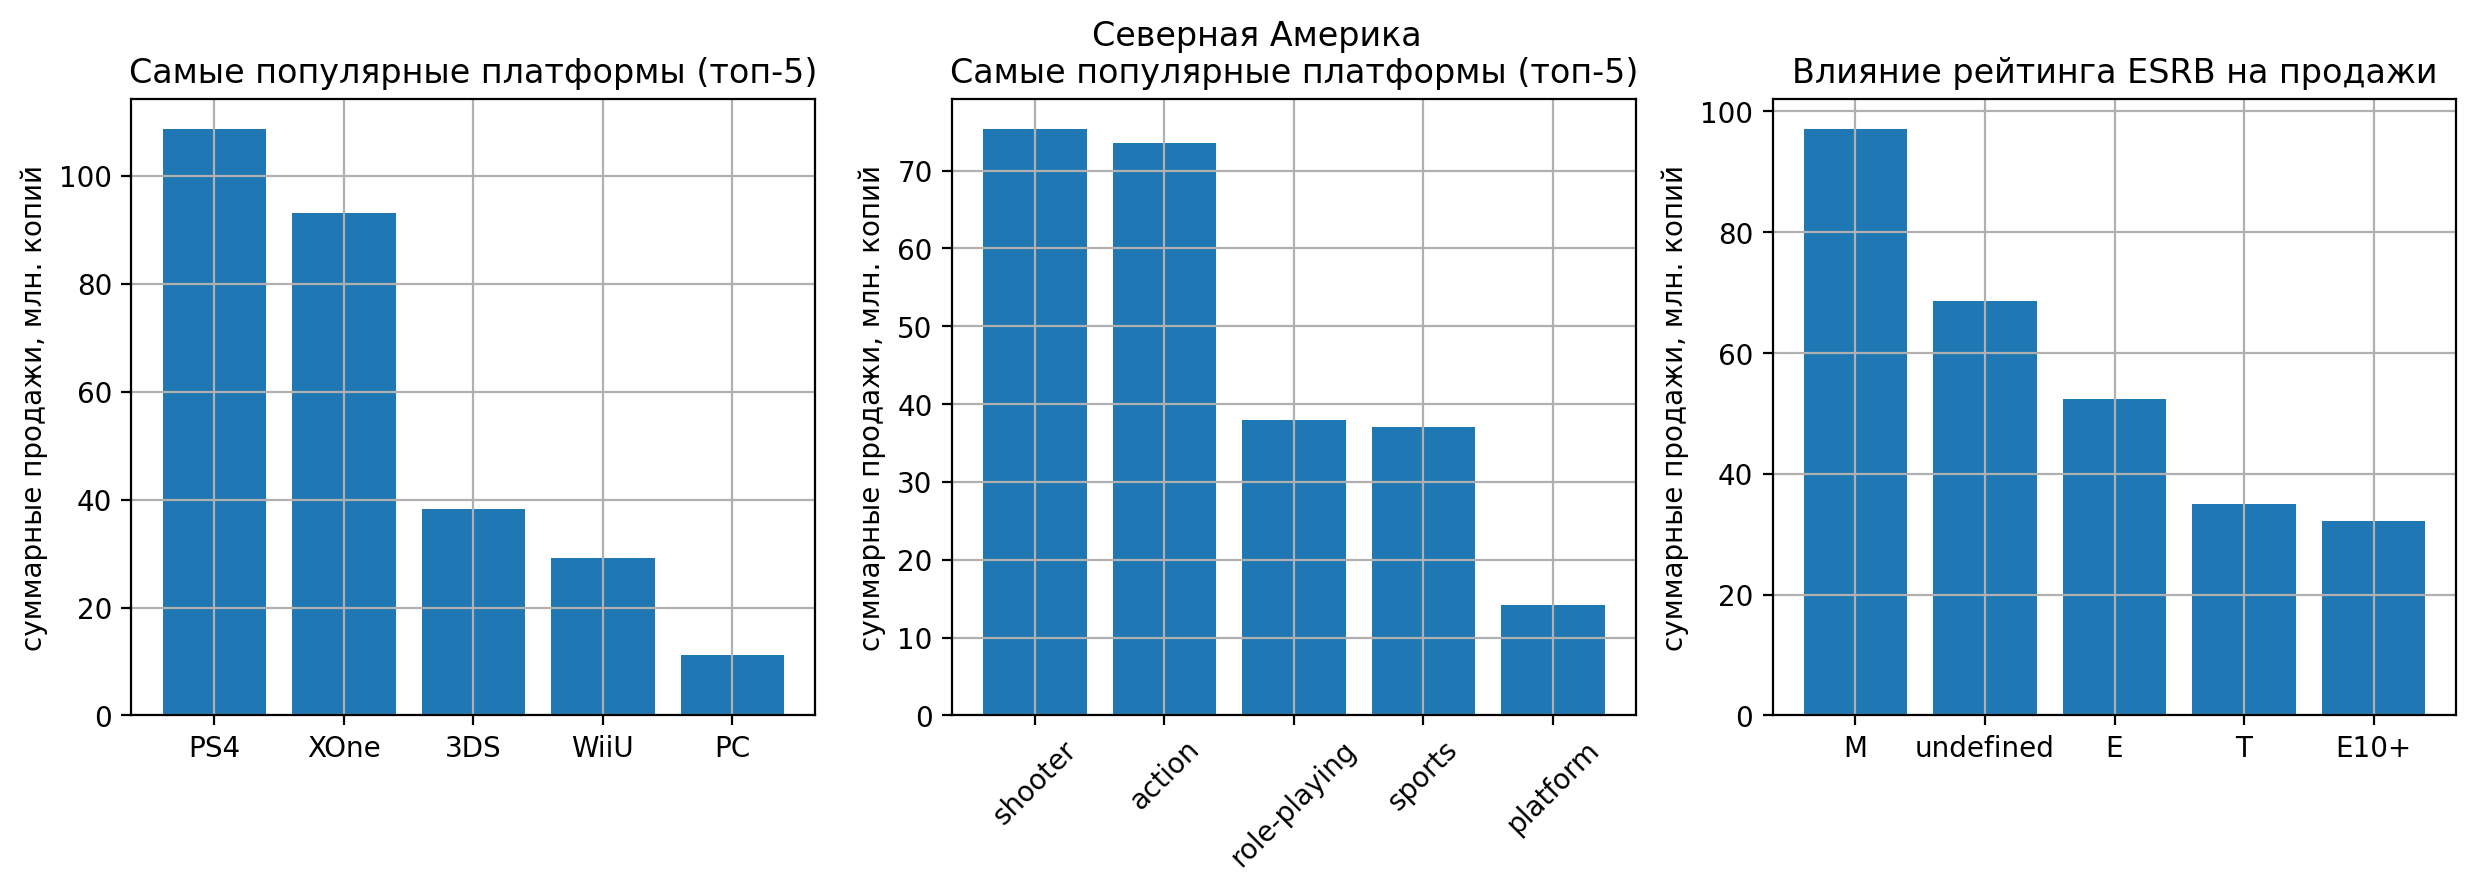

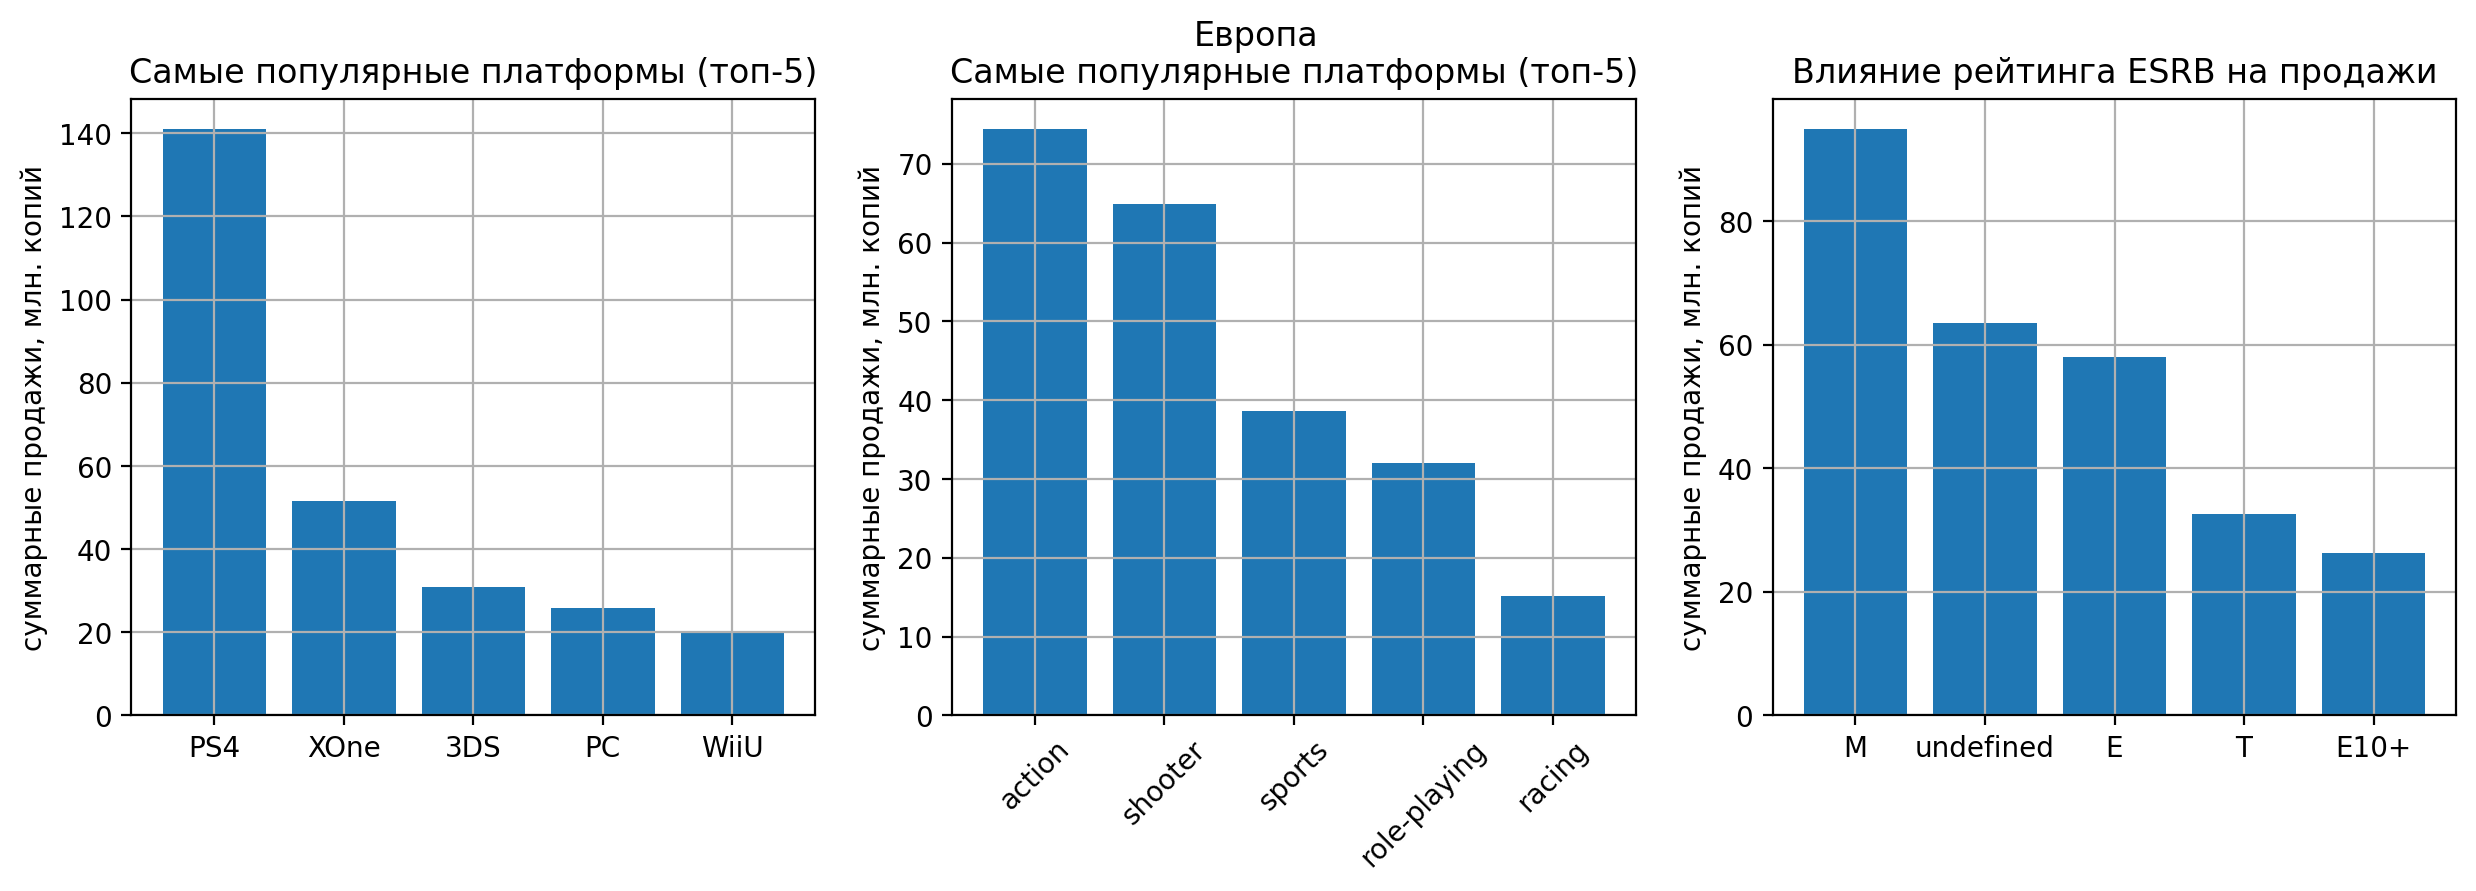

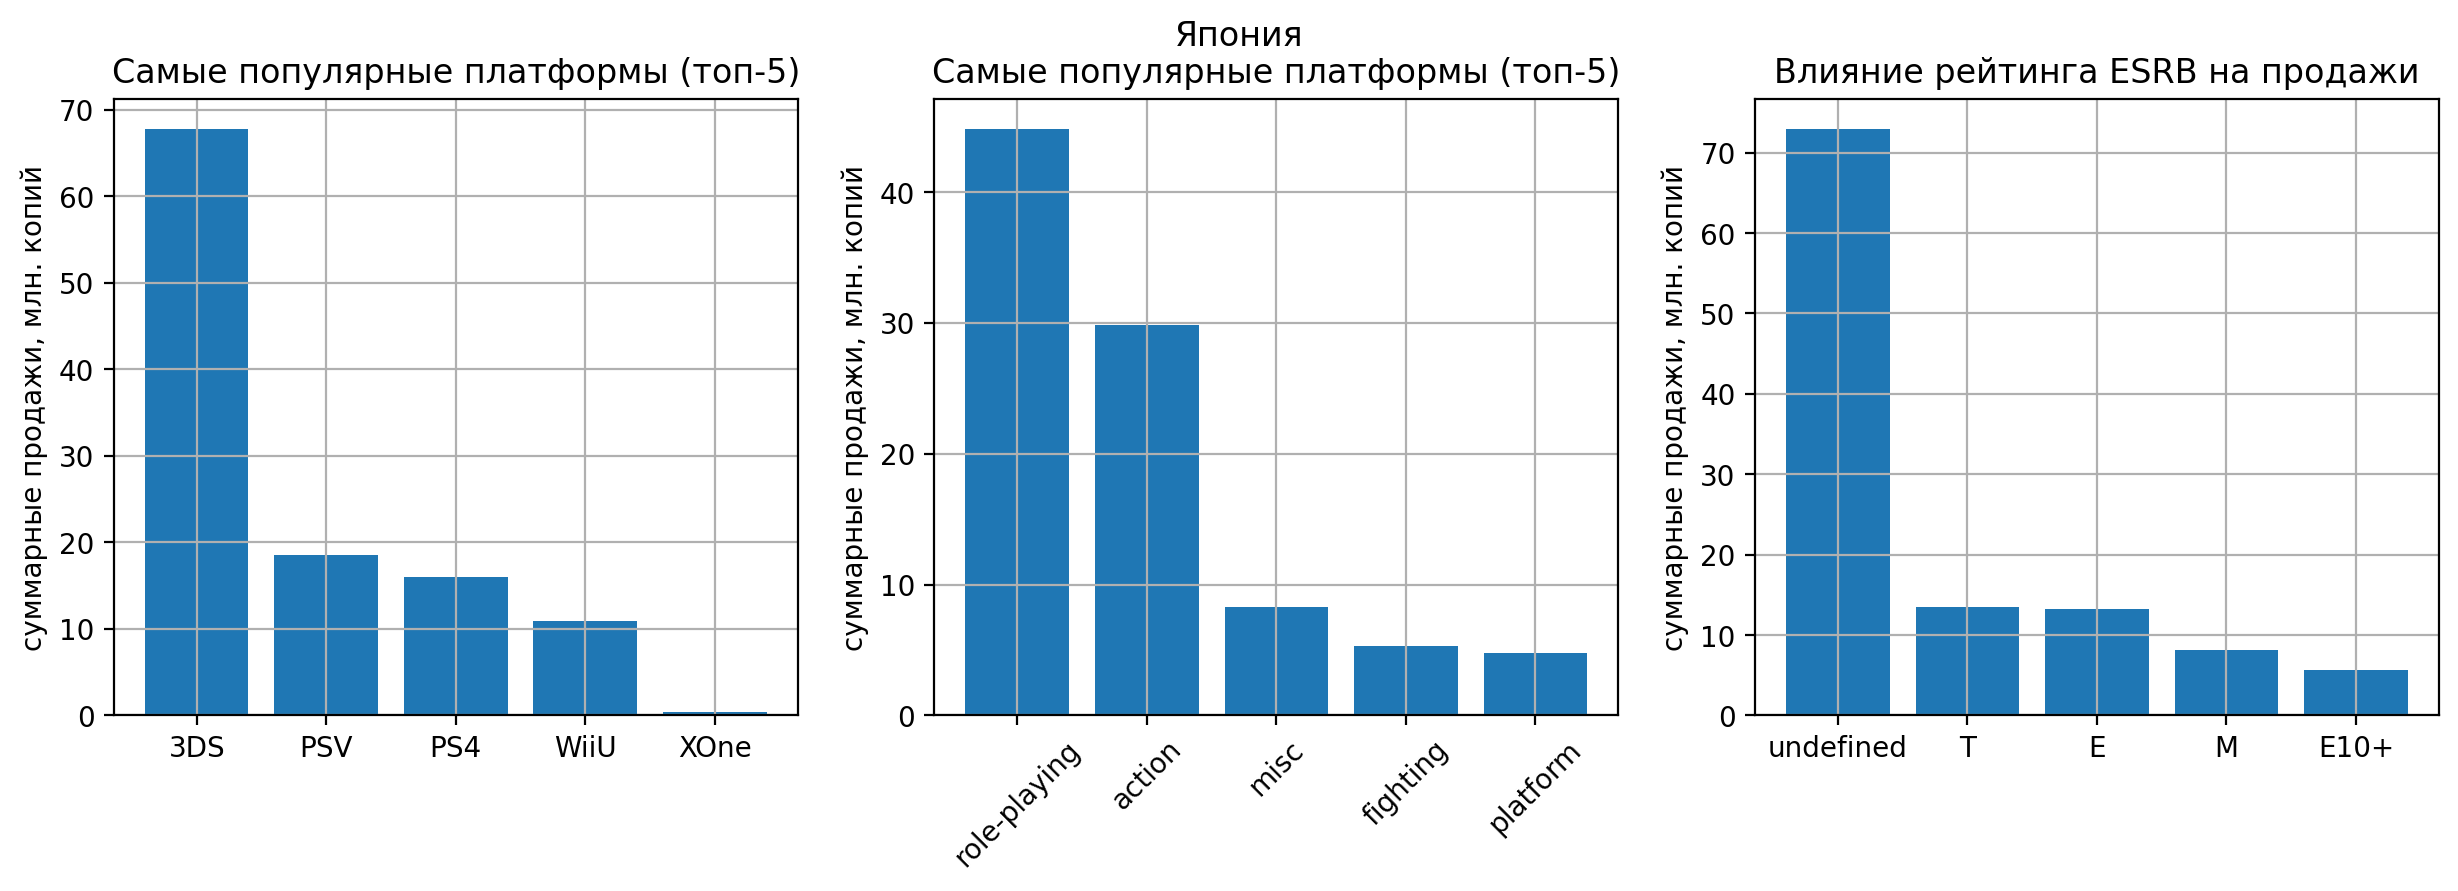

In [59]:
def user_portrait(index, region, n=5):
    '''Рисует столбчатую диаграмму продаж по региону region в зависимости от параметра index'''
    pivot_table = (target_data.pivot_table(index=index, values=region, aggfunc='sum')
                   .sort_values(region, ascending=False).head(n))
    plt.bar(pivot_table.index, pivot_table[region])   
    plt.xlabel('')
    plt.ylabel('cуммарные продажи, млн. копий')
    plt.grid()

region = ['na_sales', 'eu_sales', 'jp_sales']
region_label = ['Северная Америка','Европа','Япония']

for i in range(len(region)):
    
    plt.figure(figsize=(15, 4))
    plt.suptitle(region_label[i])

    plt.subplot(1, 3, 1)
    user_portrait('platform', region[i])   
    plt.title('Самые популярные платформы (топ-5)')

    plt.subplot(1, 3, 2)
    user_portrait('genre', region[i])  
    plt.title('Самые популярные платформы (топ-5)')
    plt.xticks(rotation=45)

    plt.subplot(1, 3, 3)
    user_portrait('rating', region[i])
    plt.title('Влияние рейтинга ESRB на продажи')
    plt.show()

In [60]:
print(f"Доля рынка Северная Америка: {target_data['na_sales'].sum() / target_data['total_sales'].sum() :.3%}")
print(f"Доля рынка Европа: {target_data['eu_sales'].sum() / target_data['total_sales'].sum() :.3%}")
print(f"Доля рынка Япония: {target_data['jp_sales'].sum() / target_data['total_sales'].sum() :.3%}")

Доля рынка Северная Америка: 37.845%
Доля рынка Европа: 36.510%
Доля рынка Япония: 15.056%


### Вывод
<a id="5_0"></a>

Наибольшие доли мирового рынка принадлежат примерно равным Северной Америке и Европе - суммарно 73.675%. Япония занимает 16%, что тоже является большим покателем для такого небольшого региона.

**Северная Америка:**
- Геймеры в большей степени предпочитают домашние консоли такие, как Sony PlayStation 4 или Xbox One.
- Самые популярные жанры Шутер и Экшен, т.е. игроки предпочитают динамичные и захватывающие игры.
- Наибольшими продажами пользуется рейтинг "Подходит для лиц старше 17 лет" (M). Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. 

**Европа:**
- Геймеры в большей степени предпочитают консоль Sony PlayStation 4.
- Самые популярные жанры Экшен и Шутер.
- Наибольшими продажами пользуется рейтинг "Подходит для лиц старше 17 лет" (M).

Не много отличий от пользователя из Северной Америки, практически идентичны за исключением предпочтения с Xbox One. Microsoft, которая производит Xbox, это американская компания, поэтому пользователи из США (наиболее крупный регион Северной Америки) предпочитают выбирать именно своего производителя.

**Япония:**
- Геймеры в большей степени предпочитают портативные консоли Nintendo 3DS или (но намного меньше) PlayStation Vita.
- Самый популярный жанр Ролевые игры.
- Наибольшими продажами пользуются игры с неопределенным рейтингом. Скорее всего это связано с тем, что рейтинг ESRB принадлежит американской компании, и производители игр в Японии не обязаны регистрировать этот рейтинг. 

Достаточно серьезные различия от пользователей из Европы и Америки. Япония обладает своими культурными особенностями, что выражается в предпочтениях геймеров. Интересно отметить, что японцы принципиально не покупают Xbox One, и видимо больше предпочитают игры выпущенные в Японии.

## 6. Статистический анализ данных.
<a id="6"></a>
Рассматриваются данные за актуальный период.

### 6.1. Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<a id="6_1"></a>
Проверим гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

$H_0$: средний пользовательский рейтинг Xbox One = средний пользовательский рейтинг PC.<br>
$H_1$:  средний пользовательский рейтинг Xbox One != средний пользовательский рейтинг PC.

Уровень статистической значимости: $\alpha = 0.05$ (если p-value окажется меньше него, отвергнем гипотезу).

Проверяется гипотеза о равенстве средних двух генеральных совокупностей. Используется T-тест Стьюдента для проверки равенства средних двух независимых генеральных совокупностей.

In [61]:
# выборки
user_score_XOne = target_data[target_data['platform'] == 'XOne']['user_score'].dropna()
user_score_PC = target_data[target_data['platform'] == 'PC']['user_score'].dropna()

# ✓ Генеральные совокупности не зависят друг от друга. 
# ✓ Выборочные средние нормально распределены. (следует из ЦПТ)
print('Размер выборки Xbox One: ', len(user_score_XOne))
print('Размер выборки PC: ', len(user_score_PC))
# ✗ Дисперсии рассматриваемых генеральных совокупностей равны.
print('Дисперсия Xbox One: ', np.var(user_score_XOne))
print('Дисперсия PC: ',np.var(user_score_PC))

Размер выборки Xbox One:  182
Размер выборки PC:  158
Дисперсия Xbox One:  1.8965188383045533
Дисперсия PC:  2.9913239064252517


In [62]:
# уровень статистической значимости
alpha = 0.05 
# t-тест
results = st.ttest_ind(user_score_XOne, user_score_PC, equal_var = False)

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Наблюдения не противоречат гипотезе.') 

p-значение: 0.16174359801784316
Наблюдения не противоречат гипотезе.


In [63]:
print('Средний пользовательский рейтинг Xbox One равен ', user_score_XOne.mean())
print('Средний пользовательский рейтинг PC равен ', user_score_PC.mean())

Средний пользовательский рейтинг Xbox One равен  6.521428571428572
Средний пользовательский рейтинг PC равен  6.280379746835442


**Вывод**<br>
Полученное значение *p-value = 0.1617* , больше заданного уровня значимости, поэтому нельзя отвергнуть нулевую гипотезу. Нет оснований говорить, что  cредние пользовательские рейтинги платформ Xbox One и PC неодинаковые.

### 6.2. Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.
<a id="6_2"></a>
Проверим гипотезу: cредние пользовательские рейтинги жанров Action и Sports разные.

$H_0$: средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports.<br>
$H_1$:  средний пользовательский рейтинг жанра Action != средний пользовательский рейтинг жанра Sports.

Уровень статистической значимости: $\alpha = 0.05$ (если p-value окажется меньше него, отвергнем гипотезу).

Проверяется гипотеза о равенстве средних двух генеральных совокупностей. Используется T-тест Стьюдента для проверки равенства средних двух независимых генеральных совокупностей.

In [64]:
# выборки
user_score_action = target_data[target_data['genre'] == 'action']['user_score'].dropna()
user_score_sports = target_data[target_data['genre'] == 'sports']['user_score'].dropna()

# ✓ Генеральные совокупности не зависят друг от друга. 
# ✓ Выборочные средние нормально распределены.
print('Размер выборки Экшен игр: ', len(user_score_action))
print('Размер выборки Спорт игр: ', len(user_score_sports))
# ✗ Дисперсии рассматриваемых генеральных совокупностей равны.
print('Дисперсия Экшен игр: ', np.var(user_score_action))
print('Дисперсия Спорт игр: ',np.var(user_score_sports))

Размер выборки Экшен игр:  288
Размер выборки Спорт игр:  101
Дисперсия Экшен игр:  1.737961033950619
Дисперсия Спорт игр:  2.645630820507794


In [65]:
# уровень статистической значимости
alpha = 0.05 
# t-тест
results = st.ttest_ind(user_score_action, user_score_sports, equal_var = False)

print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Наблюдения не противоречат гипотезе.') 

p-значение: 1.2481210261397359e-11
Отвергаем нулевую гипотезу.


In [66]:
print('Средний пользовательский рейтинг Экшен игр равен ', user_score_action.mean())
print('Средний пользовательский рейтинг Спорт игр', user_score_sports.mean())

Средний пользовательский рейтинг Экшен игр равен  6.890277777777778
Средний пользовательский рейтинг Спорт игр 5.5653465346534645


**Вывод**<br>
Полученное значение *p-value = $1.2481 \cdot 10^{-11}$*, меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что cредние пользовательские рейтинги жанров Action и Sports разные.

## 7. Общий вывод.
<a id="7"></a>

Проведено исследование архива компьютерных игр, в ходе исследования выполнено:

**1.** Была получена первоначальная информация по датасету (см. [2. Первичный анализ данных -> Вывод](#2_0)).

**2.** Обнаружены пропуски, неверные типы данных и дубликаты в датасете. Была проведена работа по заполнению пропусков. Изменены типы данных. Дубликаты обработаны. В датафрейм добавлен новый показатель. (см.[3. Предобработка данных -> Вывод](#3_0)).

**3. Проведен исследовательский анализ данных.** 

Рост выпуска игр приходится на 1994 год, далее он постепенно увеличивается с каждым годом. Пик приходится на 2008-2009 гг. релиз более 1400 игр. Далее начинается резкий спад индустрии. с 2012 года релизы новых игр выходят на плато оставаясь на уровне 500-600 игр в год.


Самые популярные игровые платформы за весь период до 2016 года это:
- Sony PlayStation 2 (PS2)
- Xbox 360 (X360)
- Sony PlayStation (PS3) 
- Nintendo Wii (Wii)
- Nintendo DS (DS) 
- Sony PlayStation (PS)

На рынке игровых платформ четкое преобладание компаний Sony, Nintendo и Microsoft.

В среднем консоль остается актуальной в течении примерно 10 лет. У каждой консоли наблюдаются периоды роста (примерно первые 5 лет) и постепенного спада. 


**Исследование актуального периода: прогноз на 2017 год.** <br>
Рассматриваемый актуальный период это данные начиная с 2013г. по 2016г. по актуальным игровым платформам: Sony PlayStation 4, Xbox One, Nintendo Wii U, Nintendo 3DS, Sony PlayStation Vita и Персональный компьютер.

В течении 4 лет с 2013 года **наиболее популярными платформами** были:
- Sony PlayStation 4 (PS4) выпущена в 2013 году
- Nintendo 3DS (3DS) выпущена в 2011 году
- Xbox One (XOne) выпущена в 2013 году
- Nintendo Wii U (WiiU) выпущена в 2012 году
- Персональный компьютер (PC)
- Sony PlayStation Vita (PSV) выпущена в 2012 году

**Наиболее перспективные платформы** - это игровые приставки **Xbox One** и **Sony PlayStation 4**. Они имеют наибольший медианный уровень продаж, и при этом не теряют свою актуальность.

Портативные приставки такие, как Nintendo Wii U, Nintendo 3DS и Sony PlayStation Vita, **теряют свою актуальность**, так как в случае "портативности" на первый план выходит мобильный гейминг. Эти платформы не рекомендуются для продвижения, так в динамике наблюдается сильный спад продаж для этих платформ.

**Оценка пользователей** не имеет существенного значения для продаж, в то время как **мнение критиков** имеет значение.

**Наиболее прибыльные жанры**:
- Шутеры (shooter) 
- Платформы (platform)
- Спорт (sports)

**Наименее прибыльные жанры**:
- Приключения (adventure) 

**4. Составлены портреты пользователей наболее значимых регионов:**

**Северная Америка (37.724% рынка):**
- Геймеры в большей степени предпочитают домашние консоли такие, как Sony PlayStation 4 или Xbox One.
- Самые популярные жанры Шутер и Экшен, т.е. игроки предпочитают динамичные и захватывающие игры.
- Наибольшими продажами пользуется рейтинг "Подходит для лиц старше 17 лет" (M). 

**Европа (35.951% рынка):**
- Геймеры в большей степени предпочитают консоль Sony PlayStation 4.
- Самые популярные жанры Экшен и Шутер.
- Наибольшими продажами пользуется рейтинг "Подходит для лиц старше 17 лет" (M).

**Япония (16.000% рынка):**
- Геймеры в большей степени предпочитают портативные консоли Nintendo 3DS или (но намного меньше) PlayStation Vita.
- Самый популярный жанр Ролевые игры.
- Наибольшими продажами пользуются игры с неопределенным рейтингом.

**5. Проведено ститистическое исследование:**
- Нет оснований говорить, что cредние пользовательские рейтинги платформ Xbox One и PC неодинаковые.
- Есть основания говорить, что cредние пользовательские рейтинги жанров Action и Sports разные.

**6. Рекомендации:**<br>
В 2017 году лучше сконцентрироваться на играх, которые отвечают следующим характеристикам:<br>

Для Северной Америки и Европы:
- Платформа: Sony PlayStation 4, Xbox One.
- Жанр: Шутер, Экшен.
- Возрастной рейтинг: для лиц старше 17 лет (M), неопределенный в ESRB.

Для Японии:
- Платформа: Nintendo 3DS.
- Жанр: Ролевые игры, Экшен.
- Возрастной рейтинг: неопределенный в ESRB.

Так же рекомендуется на японском рынке обратить внимание на новую платформу Nintendo Switch.